In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from xgcm import Grid
import numpy as np

In [2]:
import sys
sys.path.append('/home/db194/mom6_notebooks/helpers/')
from plot_helpers import *

In [3]:
def load_data(dir_name):

    exp_dic = {}
    
    exp_dic['prog'] = xr.open_mfdataset(dir_name + 'prog*.nc', decode_times=False)
    #exp_dic['cont'] = xr.open_mfdataset(dir_name + 'cont*.nc', decode_times=False)
    exp_dic['stat'] = xr.open_dataset(dir_name + 'ocean.stats.nc')

    return exp_dic

In [50]:
exp_DG_HR = load_data('/scratch/db194/mom6/mar2025/double_gyre/double_gyre_HR/')
exp_DG_LR = load_data('/scratch/db194/mom6/mar2025/double_gyre/double_gyre_20km/')
exp_DG_LR_GM = load_data('/scratch/db194/mom6/mar2025/double_gyre/double_gyre_20km_GM/')
exp_DG_LR_C0 = load_data('/scratch/db194/mom6/mar2025/double_gyre/double_gyre_20km_C0_decompose_true/')
exp_DG_LR_ANN_Cp5 = load_data('/scratch/db194/mom6/mar2025/double_gyre/double_gyre_20km_Cp5_decompose_true_upslope_limit_true_new_inv_grad/')
exp_DG_LR_ANN_Cp5_noBT = load_data('/scratch/db194/mom6/mar2025/double_gyre/double_gyre_20km_Cp5_decompose_true_upslope_limit_true_new_inv_grad_no_BT/')
exp_DG_LR_ANN_Cp7 = load_data('/scratch/db194/mom6/mar2025/double_gyre/double_gyre_20km_Cp7_decompose_true_upslope_limit_true_new_inv_grad/')
exp_DG_LR_ANN_Cp7_noBT = load_data('/scratch/db194/mom6/mar2025/double_gyre/double_gyre_20km_Cp7_decompose_true_upslope_limit_true_new_inv_grad_no_BT/')
#exp_DG_LR_ANN_C1_noBT = load_data('/scratch/db194/mom6/mar2025/double_gyre/double_gyre_20km_C1_decompose_true_upslope_limit_true_new_inv_grad_no_BT/')

In [51]:
ds_dic = {'HR': exp_DG_HR,
          'LR': exp_DG_LR,
          'LR_GM' : exp_DG_LR_GM,
          'LR_ANN_C0': exp_DG_LR_C0,
          #'LR_ANN_Cp5': exp_DG_LR_ANN_Cp5,
          'LR_ANN_Cp5_noBT': exp_DG_LR_ANN_Cp5_noBT,
          #'LR_ANN_Cp7': exp_DG_LR_ANN_Cp7,
          'LR_ANN_Cp7_noBT': exp_DG_LR_ANN_Cp7_noBT,
          #'LR_ANN_C1_noBT': exp_DG_LR_ANN_C1_noBT,
          #'LR_ANN_C1_decompose': ds_LR_ANN_C1_decomposed,
          #'LR_ANN_C1_decompose_masked': ds_LR_ANN_C1_decomposed_masked,
          #'LR_ANN_C1_decomposed_no_BT': ds_LR_ANN_C1_decomposed_noBT
         }

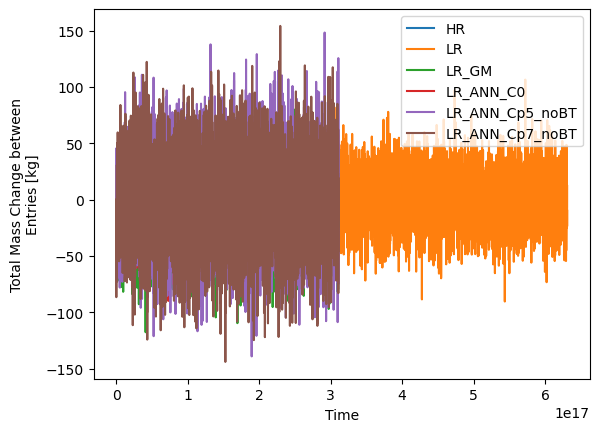

In [52]:
for k in ds_dic.keys():
    ds_dic[k]['stat'].Mass_chg.plot(label=k)

plt.legend()

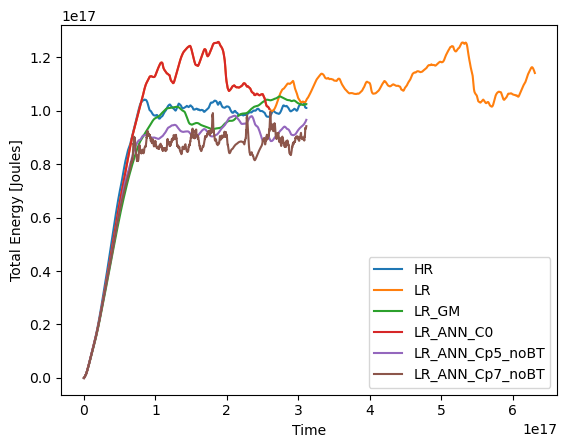

In [53]:
for k in ds_dic.keys():
    ds_dic[k]['stat'].En.plot(label=k)

plt.legend()

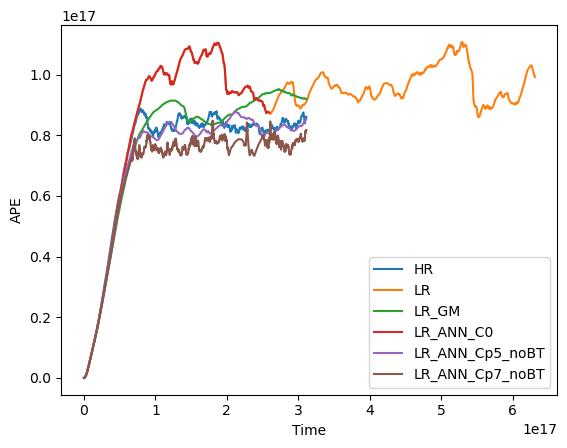

In [54]:
for k in ds_dic.keys():
    ds_dic[k]['stat'].APE.sum('Interface').plot(label=k)

plt.legend()

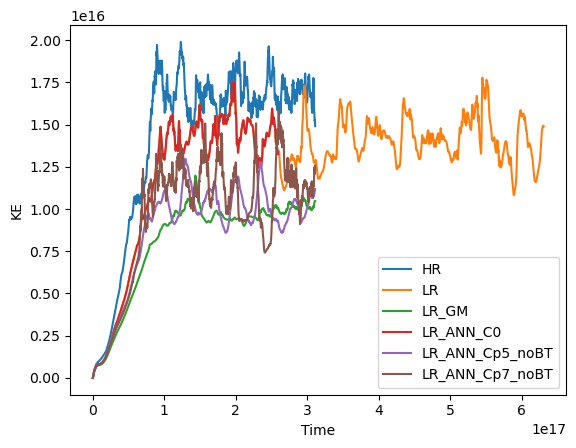

In [55]:
for k in ds_dic.keys():
    ds_dic[k]['stat'].KE.sum('Layer').plot(label=k)

plt.legend()

In [44]:
def plot_1(idt): 
    zl = 0
    plt.figure(figsize=(12, 9))
    plt.subplot(3,3,1)
    ds_dic['HR']['prog'].RV.isel(Time=idt, zl=zl).plot(label='HR', vmin=-6e-6)
    plt.title('HR')
    for i, k in enumerate(list(ds_dic.keys())[1:]):
    
        plt.subplot(3,3,i+4)
        ds_dic[k]['prog'].RV.isel(Time=idt, zl=zl).plot(label=k, vmin=-6e-6)
        plt.title(k)
    
    plt.tight_layout()

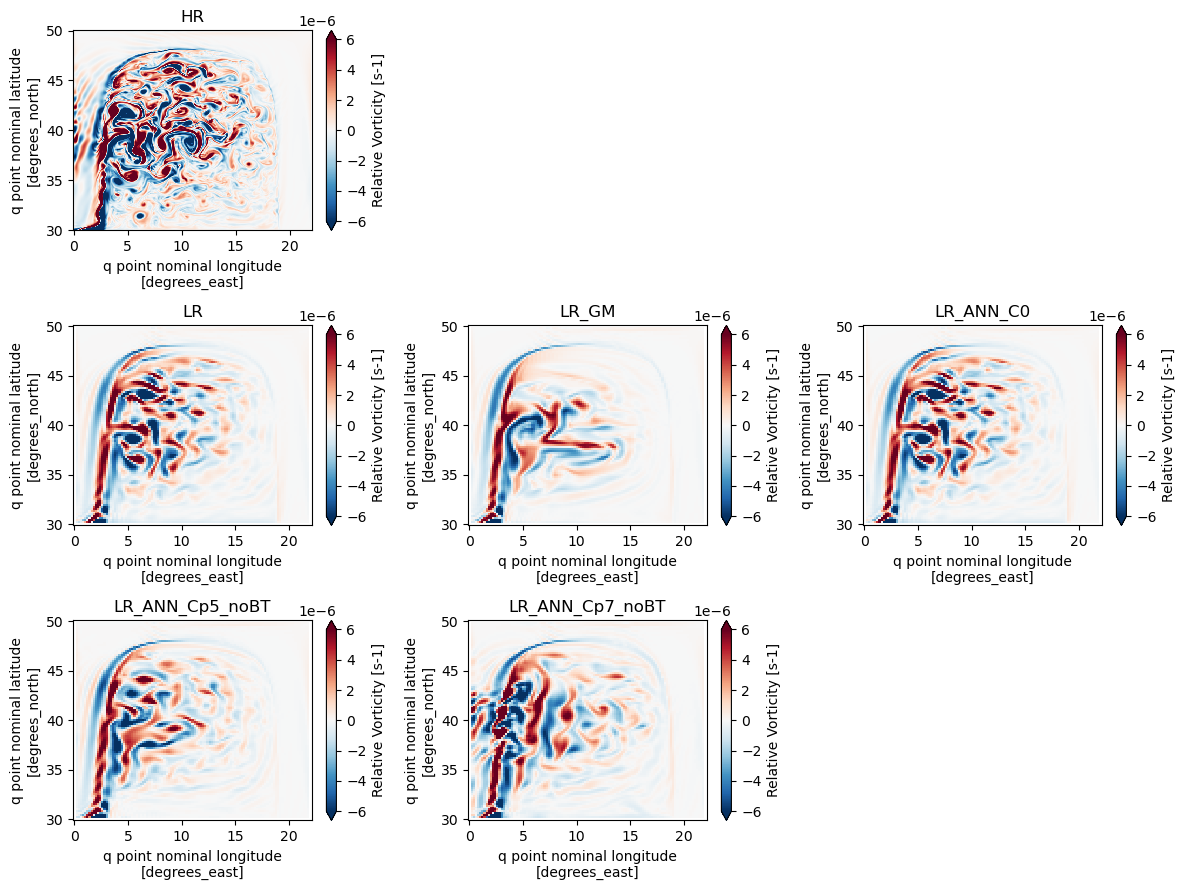

In [45]:
plot_1(599)

In [46]:
def plot_2(idt): 
    plt.figure(figsize=(12, 9))
    plt.subplot(3,3,1)
    ds_dic['HR']['prog'].RV.isel(Time=idt, zl=1).plot(label='HR', robust=True)
    plt.title('HR')
    for i, k in enumerate(list(ds_dic.keys())[1:]):
    
        plt.subplot(3,3,i+4)
        ds_dic[k]['prog'].RV.isel(Time=idt, zl=1).plot(label=k, robust=True)
        plt.title(k)
    
    plt.tight_layout()

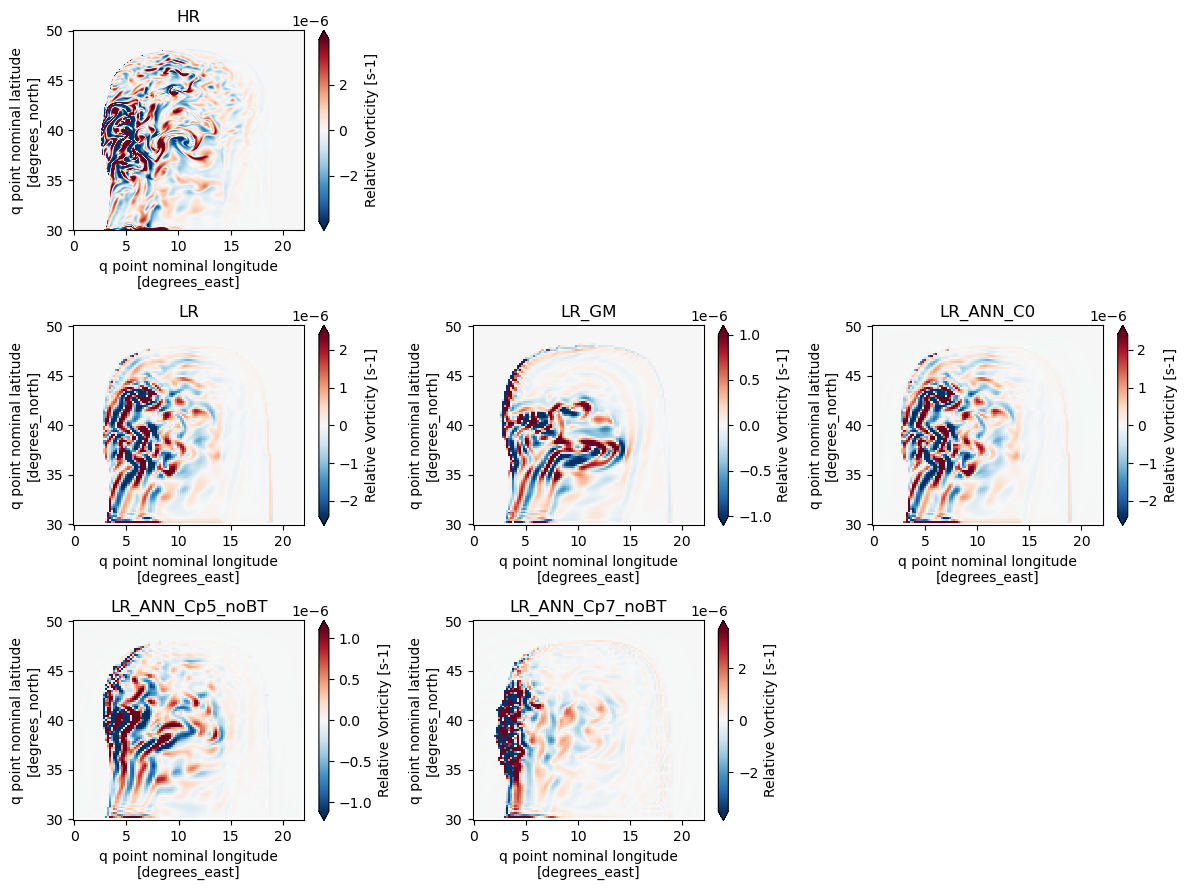

In [47]:
plot_2(599)

In [22]:
create_animation(plot_2, range(0,599), 'DG_vort_wBT.gif', dpi=100, FPS=6)

Animation at FPS=6 will last for 99.83333333333333 seconds


In [48]:
create_animation(plot_1, range(0,599,2), 'DG_vort_wBT_layer1.gif', dpi=100, FPS=6)

Animation at FPS=6 will last for 50.0 seconds


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


HR 10.0 3600.0
LR 10.0 7300.0
LR_GM 10.0 7300.0
LR_ANN_C0 10.0 3000.0
LR_ANN_Cp5 10.0 3600.0
LR_ANN_Cp7 10.0 3600.0


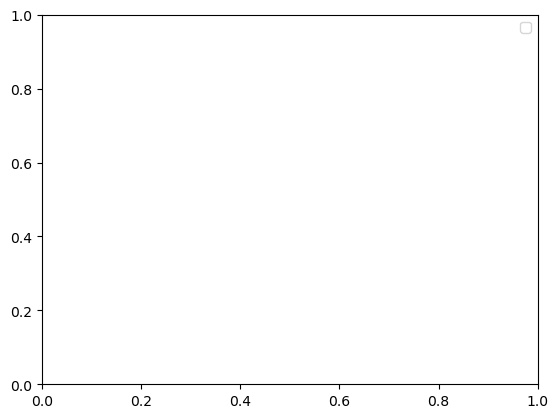

In [23]:
for k in ds_dic.keys():
    print(k, ds_dic[k]['prog'].Time[1].values, ds_dic[k]['prog'].Time[-1].values)

plt.legend()

Text(0.5, 1.0, 'Double gyre')

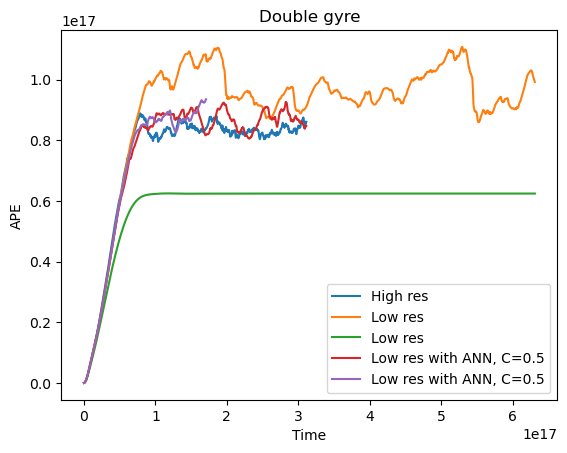

In [44]:
#exp_DG_HR['stat'].Mass_chg.plot()

exp_DG_HR['stat'].APE.sum('Interface').plot(label='High res')
exp_DG_LR['stat'].APE.sum('Interface').plot(label='Low res')
exp_DG_LR_GM['stat'].APE.sum('Interface').plot(label='Low res')
#exp_DG_LR_ANN_C1_upslope_limit['stat'].APE.sum('Interface').plot(label='Low res with ANN')
#exp_DG_LR_ANN_C1_upslope_limit_new_flux['stat'].APE.sum('Interface').plot(label='Low res with ANN')
#exp_DG_LR_ANN_Cp5_upslope_limit_new_flux['stat'].APE.sum('Interface').plot(label='Low res with ANN, C=0.5')
exp_DG_LR_ANN_Cp5_upslope_limit_new_flux_no_mask['stat'].APE.sum('Interface').plot(label='Low res with ANN, C=0.5')
exp_DG_LR_ANN_Cp5_upslope_limit_inv_grad['stat'].APE.sum('Interface').plot(label='Low res with ANN, C=0.5')
#exp_DG_LR_ANN_Cp7_upslope_limit_new_flux_no_mask['stat'].APE.sum('Interface').plot(label='Low res with ANN, C=0.7')
#exp_DG_LR_ANN_C1_upslope_limit_new_flux_no_mask['stat'].APE.sum('Interface').plot(label='Low res with ANN, C=1')
plt.legend()
plt.title('Double gyre')
#exp_DG_LR_ANN_C1_BT_remove_upslope_limit['stat'].APE.sum('Interface').plot()
#plt.ylim([

Text(0.5, 1.0, 'Double gyre')

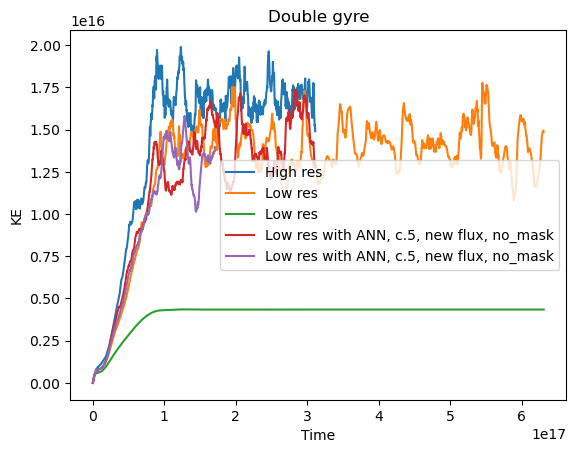

In [45]:
#exp_DG_HR['stat'].Mass_chg.plot()

exp_DG_HR['stat'].KE.sum('Layer').plot(label='High res')
exp_DG_LR['stat'].KE.sum('Layer').plot(label='Low res')
exp_DG_LR_GM['stat'].KE.sum('Layer').plot(label='Low res')
#exp_DG_LR_ANN_C1_upslope_limit['stat'].KE.sum('Layer').plot(label='Low res with ANN')
#exp_DG_LR_ANN_C1_upslope_limit_new_flux['stat'].KE.sum('Layer').plot(label='Low res with ANN, new flux')
#exp_DG_LR_ANN_Cp5_upslope_limit_new_flux['stat'].KE.sum('Layer').plot(label='Low res with ANN, c.5, new flux')
exp_DG_LR_ANN_Cp5_upslope_limit_new_flux_no_mask['stat'].KE.sum('Layer').plot(label='Low res with ANN, c.5, new flux, no_mask')
exp_DG_LR_ANN_Cp5_upslope_limit_inv_grad['stat'].KE.sum('Layer').plot(label='Low res with ANN, c.5, new flux, no_mask')
#exp_DG_LR_ANN_Cp7_upslope_limit_new_flux_no_mask['stat'].KE.sum('Layer').plot(label='Low res with ANN, c.7, new flux, no_mask')
#exp_DG_LR_ANN_C1_upslope_limit_new_flux_no_mask['stat'].KE.sum('Layer').plot(label='Low res with ANN, c1, new flux, no_mask')

plt.legend()
plt.title('Double gyre')
#exp_DG_LR_ANN_C1_BT_remove_upslope_limit['stat'].APE.sum('Interface').plot()
#plt.ylim([

In [87]:
exp_DG_LR_ANN_C1_upslope_limit['prog']

<xarray.Dataset>
Dimensions:  (xq: 111, yh: 100, zl: 2, Time: 360, xh: 110, yq: 101, zi: 3)
Coordinates:
  * xq       (xq) float64 0.0 0.2 0.4 0.6 0.8 1.0 ... 21.2 21.4 21.6 21.8 22.0
  * yh       (yh) float64 30.1 30.3 30.5 30.7 30.9 ... 49.1 49.3 49.5 49.7 49.9
  * zl       (zl) float64 1.035e+03 1.036e+03
  * Time     (Time) float64 5.0 10.0 15.0 20.0 ... 1.79e+03 1.795e+03 1.8e+03
  * xh       (xh) float64 0.1 0.3 0.5 0.7 0.9 1.1 ... 21.1 21.3 21.5 21.7 21.9
  * yq       (yq) float64 30.0 30.2 30.4 30.6 30.8 ... 49.2 49.4 49.6 49.8 50.0
  * zi       (zi) float64 1.034e+03 1.036e+03 1.037e+03
Data variables: (12/19)
    u        (Time, zl, yh, xq) float64 dask.array<chunksize=(20, 2, 100, 111), meta=np.ndarray>
    v        (Time, zl, yq, xh) float64 dask.array<chunksize=(20, 2, 101, 110), meta=np.ndarray>
    h        (Time, zl, yh, xh) float64 dask.array<chunksize=(20, 2, 100, 110), meta=np.ndarray>
    e        (Time, zi, yh, xh) float64 dask.array<chunksize=(20, 3, 100, 110), meta=np.ndarray>
    RV       (Time, zl, yq, xq) float64 dask.array<chunksize=(20, 2, 101, 111), meta=np.ndarray>
    PV       (Time, zl, yq, xq) float64 dask.array<chunksize=(20, 2, 101, 111), meta=np.ndarray>
    ...       ...
    dvdx     (Time, zl, yh, xh) float64 dask.array<chunksize=(20, 2, 100, 110), meta=np.ndarray>
    dvdy     (Time, zl, yh, xh) float64 dask.array<chunksize=(20, 2, 100, 110), meta=np.ndarray>
    Fx       (Time, zl, yh, xh) float64 dask.array<chunksize=(20, 2, 100, 110), meta=np.ndarray>
    Fy       (Time, zl, yh, xh) float64 dask.array<chunksize=(20, 2, 100, 110), meta=np.ndarray>
    uhTrANN  (Time, zl, yh, xq) float64 dask.array<chunksize=(20, 2, 100, 111), meta=np.ndarray>
    vhTrANN  (Time, zl, yq, xh) float64 dask.array<chunksize=(20, 2, 101, 110), meta=np.ndarray>
Attributes:
    filename:   prog__0005.nc
    title:      Double Gyre experiment
    grid_type:  regular
    grid_tile:  N/A

In [88]:
def plot(idT, ds = exp_DG_LR_ANN_C1_upslope_limit): 

    #ds = exp_DG_LR_ANN_C1_upslope_limit
    #idT = 65 
    zl = 1
    plt.figure(figsize=(8,3))
    
    plt.subplot(121)
    ds['prog'].RV.isel(Time=idT, zl=zl).plot(robust=True)
    
    plt.subplot(122)
    ds['prog'].h.isel(Time=idT, zl=zl).plot()
    ds['prog'].h.isel(Time=idT, zl=zl).plot.contour(levels=[0, 1])
    
    plt.tight_layout()    

In [89]:
exp_DG_LR_ANN_C1_upslope_limit['prog']

<xarray.Dataset>
Dimensions:  (xq: 111, yh: 100, zl: 2, Time: 360, xh: 110, yq: 101, zi: 3)
Coordinates:
  * xq       (xq) float64 0.0 0.2 0.4 0.6 0.8 1.0 ... 21.2 21.4 21.6 21.8 22.0
  * yh       (yh) float64 30.1 30.3 30.5 30.7 30.9 ... 49.1 49.3 49.5 49.7 49.9
  * zl       (zl) float64 1.035e+03 1.036e+03
  * Time     (Time) float64 5.0 10.0 15.0 20.0 ... 1.79e+03 1.795e+03 1.8e+03
  * xh       (xh) float64 0.1 0.3 0.5 0.7 0.9 1.1 ... 21.1 21.3 21.5 21.7 21.9
  * yq       (yq) float64 30.0 30.2 30.4 30.6 30.8 ... 49.2 49.4 49.6 49.8 50.0
  * zi       (zi) float64 1.034e+03 1.036e+03 1.037e+03
Data variables: (12/19)
    u        (Time, zl, yh, xq) float64 dask.array<chunksize=(20, 2, 100, 111), meta=np.ndarray>
    v        (Time, zl, yq, xh) float64 dask.array<chunksize=(20, 2, 101, 110), meta=np.ndarray>
    h        (Time, zl, yh, xh) float64 dask.array<chunksize=(20, 2, 100, 110), meta=np.ndarray>
    e        (Time, zi, yh, xh) float64 dask.array<chunksize=(20, 3, 100, 110), meta=np.ndarray>
    RV       (Time, zl, yq, xq) float64 dask.array<chunksize=(20, 2, 101, 111), meta=np.ndarray>
    PV       (Time, zl, yq, xq) float64 dask.array<chunksize=(20, 2, 101, 111), meta=np.ndarray>
    ...       ...
    dvdx     (Time, zl, yh, xh) float64 dask.array<chunksize=(20, 2, 100, 110), meta=np.ndarray>
    dvdy     (Time, zl, yh, xh) float64 dask.array<chunksize=(20, 2, 100, 110), meta=np.ndarray>
    Fx       (Time, zl, yh, xh) float64 dask.array<chunksize=(20, 2, 100, 110), meta=np.ndarray>
    Fy       (Time, zl, yh, xh) float64 dask.array<chunksize=(20, 2, 100, 110), meta=np.ndarray>
    uhTrANN  (Time, zl, yh, xq) float64 dask.array<chunksize=(20, 2, 100, 111), meta=np.ndarray>
    vhTrANN  (Time, zl, yq, xh) float64 dask.array<chunksize=(20, 2, 101, 110), meta=np.ndarray>
Attributes:
    filename:   prog__0005.nc
    title:      Double Gyre experiment
    grid_type:  regular
    grid_tile:  N/A

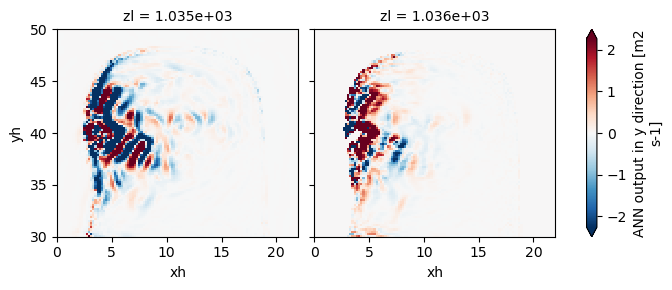

In [90]:
exp_DG_LR_ANN_C1_upslope_limit['prog'].Fy.isel(Time=-1).plot(col='zl', robust=True)

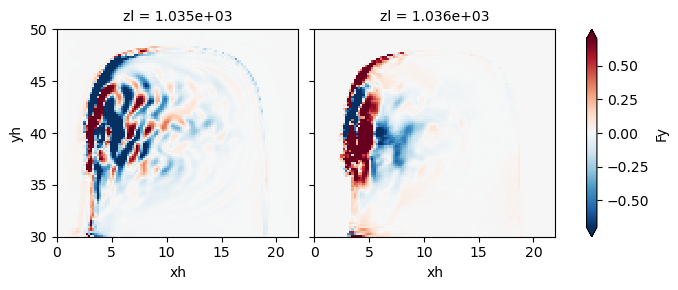

In [56]:
exp_DG_LR_ANN_C1_upslope_limit['prog'].Fy.isel(Time=slice(200, 360)).mean('Time').plot(col='zl', robust=True, vmin=-0.7)

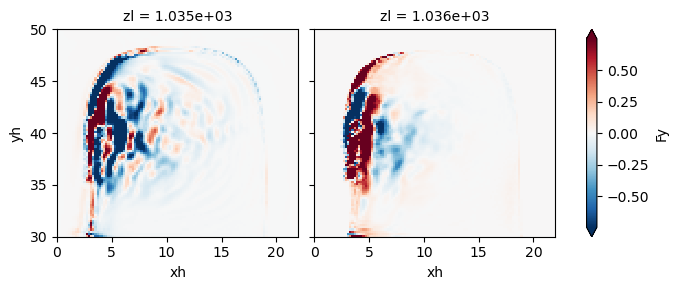

In [58]:
exp_DG_LR_ANN_C1_upslope_limit_new_flux['prog'].Fy.isel(Time=slice(200, 360)).mean('Time').plot(col='zl', robust=True)

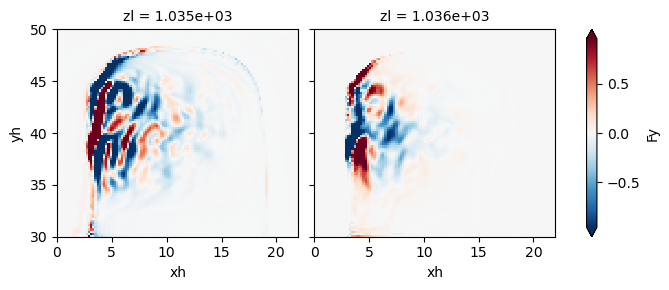

In [59]:
exp_DG_LR_ANN_Cp5_upslope_limit_new_flux['prog'].Fy.isel(Time=slice(200, 360)).mean('Time').plot(col='zl', robust=True)

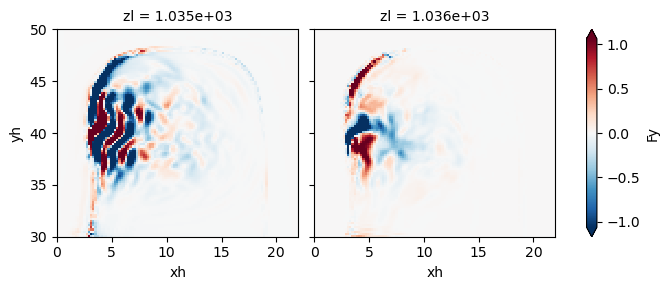

In [68]:
exp_DG_LR_ANN_Cp5_upslope_limit_new_flux_no_mask['prog'].Fy.isel(Time=slice(200, 360)).mean('Time').plot(col='zl', robust=True)

In [86]:
exp_DG_LR_ANN_C1_upslope_limit_new_flux_no_mask['prog'].Fy.isel(Time=slice(200, 360)).mean('Time').plot(col='zl', robust=True)

KeyError: 'prog'

In [72]:
exp_DG_LR_ANN_Cp5_upslope_limit_new_flux_no_mask['prog']

<xarray.Dataset>
Dimensions:  (xq: 111, yh: 100, zl: 2, Time: 720, xh: 110, yq: 101, zi: 3)
Coordinates:
  * xq       (xq) float64 0.0 0.2 0.4 0.6 0.8 1.0 ... 21.2 21.4 21.6 21.8 22.0
  * yh       (yh) float64 30.1 30.3 30.5 30.7 30.9 ... 49.1 49.3 49.5 49.7 49.9
  * zl       (zl) float64 1.035e+03 1.036e+03
  * Time     (Time) float64 5.0 10.0 15.0 20.0 ... 3.59e+03 3.595e+03 3.6e+03
  * xh       (xh) float64 0.1 0.3 0.5 0.7 0.9 1.1 ... 21.1 21.3 21.5 21.7 21.9
  * yq       (yq) float64 30.0 30.2 30.4 30.6 30.8 ... 49.2 49.4 49.6 49.8 50.0
  * zi       (zi) float64 1.034e+03 1.036e+03 1.037e+03
Data variables: (12/19)
    u        (Time, zl, yh, xq) float64 dask.array<chunksize=(20, 2, 100, 111), meta=np.ndarray>
    v        (Time, zl, yq, xh) float64 dask.array<chunksize=(20, 2, 101, 110), meta=np.ndarray>
    h        (Time, zl, yh, xh) float64 dask.array<chunksize=(20, 2, 100, 110), meta=np.ndarray>
    e        (Time, zi, yh, xh) float64 dask.array<chunksize=(20, 3, 100, 110), meta=np.ndarray>
    RV       (Time, zl, yq, xq) float64 dask.array<chunksize=(20, 2, 101, 111), meta=np.ndarray>
    PV       (Time, zl, yq, xq) float64 dask.array<chunksize=(20, 2, 101, 111), meta=np.ndarray>
    ...       ...
    dvdx     (Time, zl, yh, xh) float64 dask.array<chunksize=(20, 2, 100, 110), meta=np.ndarray>
    dvdy     (Time, zl, yh, xh) float64 dask.array<chunksize=(20, 2, 100, 110), meta=np.ndarray>
    Fx       (Time, zl, yh, xh) float64 dask.array<chunksize=(20, 2, 100, 110), meta=np.ndarray>
    Fy       (Time, zl, yh, xh) float64 dask.array<chunksize=(20, 2, 100, 110), meta=np.ndarray>
    uhTrANN  (Time, zl, yh, xq) float64 dask.array<chunksize=(20, 2, 100, 111), meta=np.ndarray>
    vhTrANN  (Time, zl, yq, xh) float64 dask.array<chunksize=(20, 2, 101, 110), meta=np.ndarray>
Attributes:
    filename:   prog__0005.nc
    title:      Double Gyre experiment
    grid_type:  regular
    grid_tile:  N/A

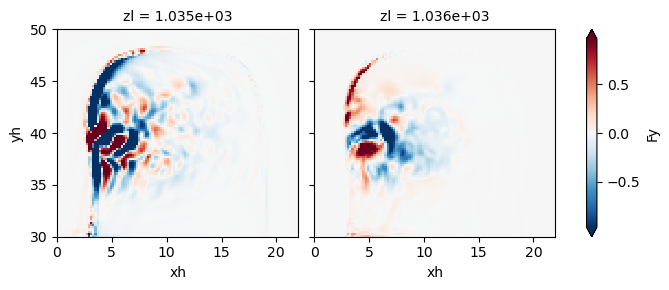

In [92]:
exp_DG_LR_C0['prog'].Fy.isel(Time=slice(200, 360)).mean('Time').plot(col='zl', robust=True)

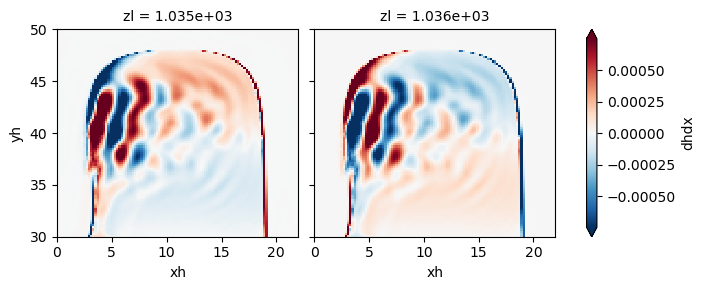

In [93]:
exp_DG_LR_ANN_C1_upslope_limit['prog'].dhdx.isel(Time=slice(200, 360)).mean('Time').plot(col='zl', robust=True)

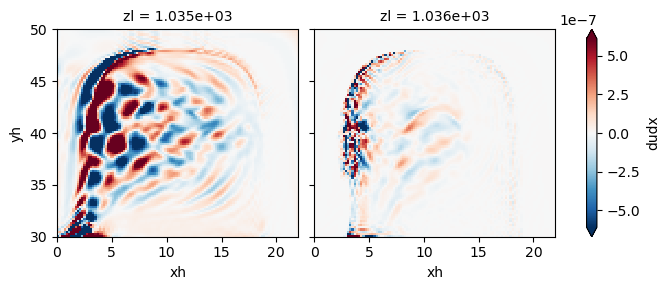

In [94]:
exp_DG_LR_ANN_C1_upslope_limit['prog'].dudx.isel(Time=slice(200, 360)).mean('Time').plot(col='zl', robust=True)

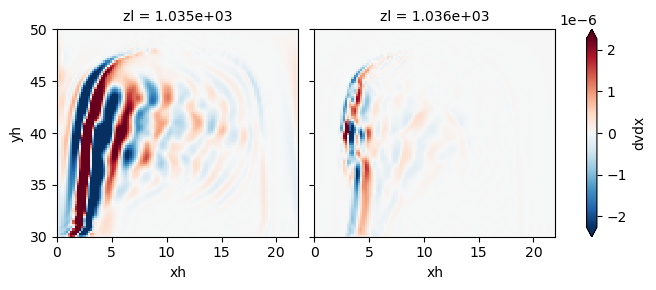

In [95]:
exp_DG_LR_ANN_C1_upslope_limit['prog'].dvdx.isel(Time=slice(200, 360)).mean('Time').plot(col='zl', robust=True)

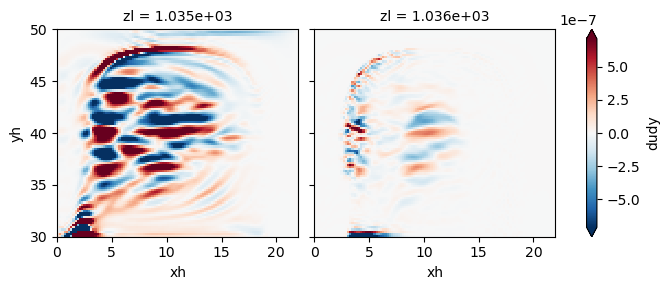

In [96]:
exp_DG_LR_ANN_C1_upslope_limit['prog'].dudy.isel(Time=slice(200, 360)).mean('Time').plot(col='zl', robust=True)

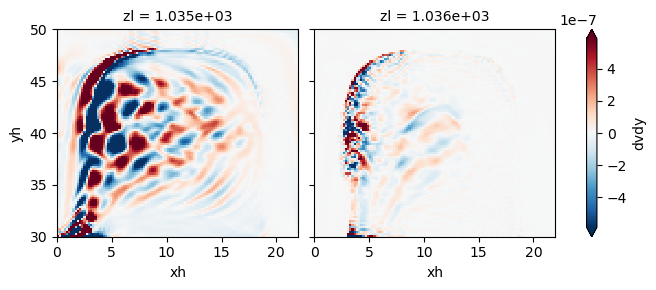

In [97]:
exp_DG_LR_ANN_C1_upslope_limit['prog'].dvdy.isel(Time=slice(200, 360)).mean('Time').plot(col='zl', robust=True)

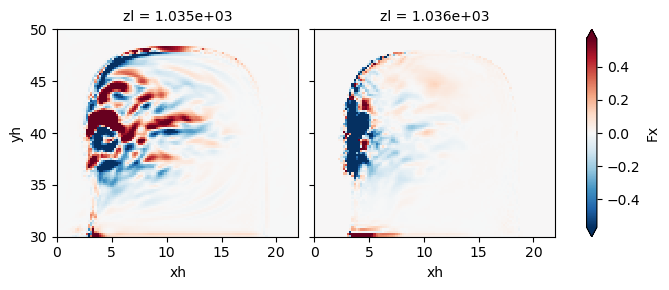

In [122]:
exp_DG_LR_ANN_C1_upslope_limit['prog'].Fx.isel(Time=slice(200, 360)).mean('Time').plot(col='zl', robust=True)

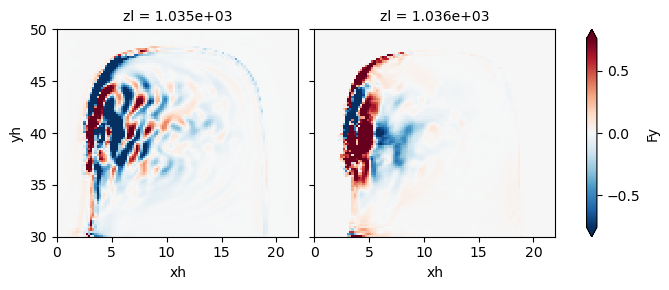

In [121]:
exp_DG_LR_ANN_C1_upslope_limit['prog'].Fy.isel(Time=slice(200, 360)).mean('Time').plot(col='zl', robust=True)

In [69]:
def plot2by2(idT, ds = exp_DG_LR_ANN_Cp5_upslope_limit_new_flux_no_mask): 

    #ds = exp_DG_LR_ANN_C1_upslope_limit
    #idT = 65 
    
    plt.figure(figsize=(8,6))

    zl = 0
    plt.subplot(221)
    ds['prog'].RV.isel(Time=idT, zl=zl).plot(robust=True)
    
    plt.subplot(222)
    ds['prog'].h.isel(Time=idT, zl=zl).plot()
    ds['prog'].h.isel(Time=idT, zl=zl).plot.contour(levels=[0, 1])

    zl = 1
    plt.subplot(223)
    ds['prog'].RV.isel(Time=idT, zl=zl).plot(robust=True)
    
    plt.subplot(224)
    ds['prog'].h.isel(Time=idT, zl=zl).plot()
    ds['prog'].h.isel(Time=idT, zl=zl).plot.contour(levels=[0, 1])
    
    plt.tight_layout()    

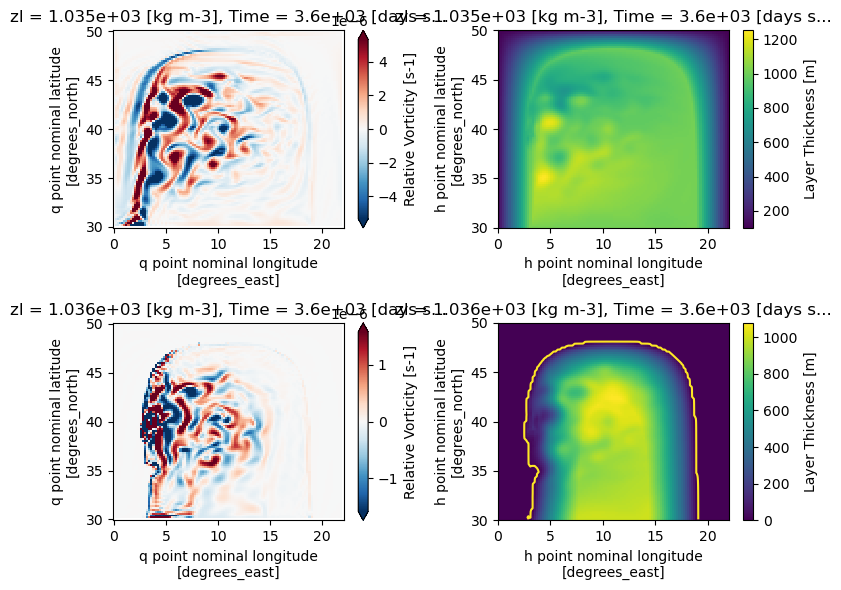

In [73]:
plot2by2(-1)

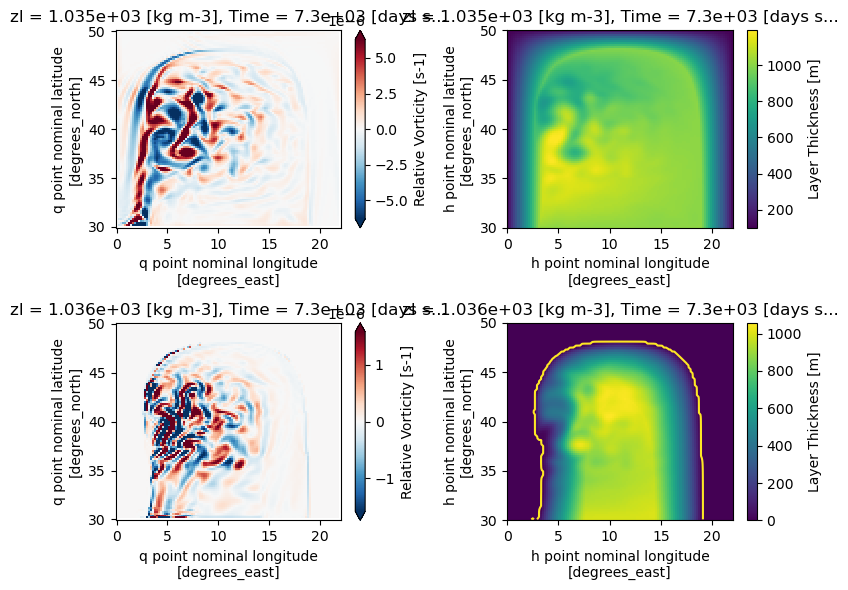

In [16]:
plot2by2(-1, ds = exp_DG_LR)

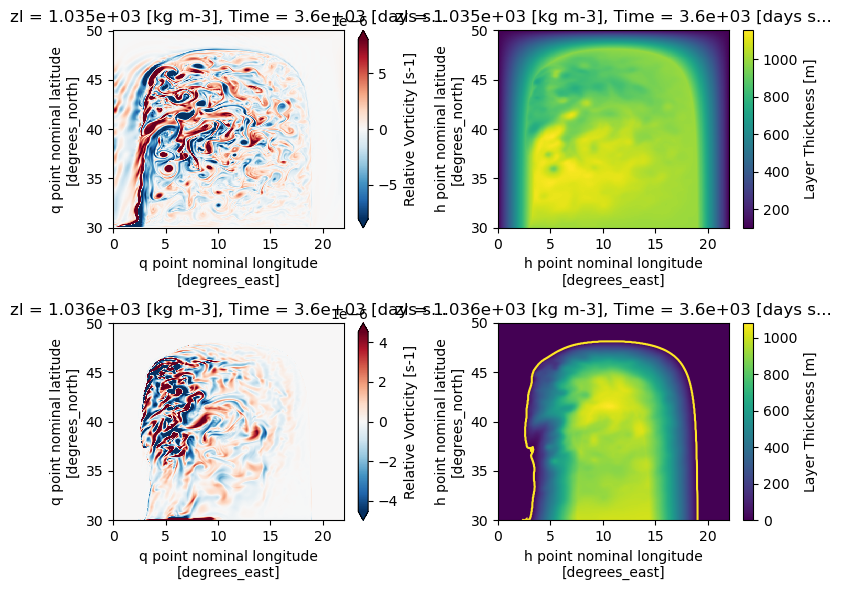

In [17]:
plot2by2(-1, ds = exp_DG_HR)

In [18]:
exp_DG_LR_ANN_C1_upslope_limit['prog']

<xarray.Dataset>
Dimensions:  (xq: 111, yh: 100, zl: 2, Time: 720, xh: 110, yq: 101, zi: 3)
Coordinates:
  * xq       (xq) float64 0.0 0.2 0.4 0.6 0.8 1.0 ... 21.2 21.4 21.6 21.8 22.0
  * yh       (yh) float64 30.1 30.3 30.5 30.7 30.9 ... 49.1 49.3 49.5 49.7 49.9
  * zl       (zl) float64 1.035e+03 1.036e+03
  * Time     (Time) float64 5.0 10.0 15.0 20.0 ... 3.59e+03 3.595e+03 3.6e+03
  * xh       (xh) float64 0.1 0.3 0.5 0.7 0.9 1.1 ... 21.1 21.3 21.5 21.7 21.9
  * yq       (yq) float64 30.0 30.2 30.4 30.6 30.8 ... 49.2 49.4 49.6 49.8 50.0
  * zi       (zi) float64 1.034e+03 1.036e+03 1.037e+03
Data variables: (12/19)
    u        (Time, zl, yh, xq) float64 dask.array<chunksize=(20, 2, 100, 111), meta=np.ndarray>
    v        (Time, zl, yq, xh) float64 dask.array<chunksize=(20, 2, 101, 110), meta=np.ndarray>
    h        (Time, zl, yh, xh) float64 dask.array<chunksize=(20, 2, 100, 110), meta=np.ndarray>
    e        (Time, zi, yh, xh) float64 dask.array<chunksize=(20, 3, 100, 110), meta=np.ndarray>
    RV       (Time, zl, yq, xq) float64 dask.array<chunksize=(20, 2, 101, 111), meta=np.ndarray>
    PV       (Time, zl, yq, xq) float64 dask.array<chunksize=(20, 2, 101, 111), meta=np.ndarray>
    ...       ...
    dvdx     (Time, zl, yh, xh) float64 dask.array<chunksize=(20, 2, 100, 110), meta=np.ndarray>
    dvdy     (Time, zl, yh, xh) float64 dask.array<chunksize=(20, 2, 100, 110), meta=np.ndarray>
    Fx       (Time, zl, yh, xh) float64 dask.array<chunksize=(20, 2, 100, 110), meta=np.ndarray>
    Fy       (Time, zl, yh, xh) float64 dask.array<chunksize=(20, 2, 100, 110), meta=np.ndarray>
    uhTrANN  (Time, zl, yh, xq) float64 dask.array<chunksize=(20, 2, 100, 111), meta=np.ndarray>
    vhTrANN  (Time, zl, yq, xh) float64 dask.array<chunksize=(20, 2, 101, 110), meta=np.ndarray>
Attributes:
    filename:   prog__0005.nc
    title:      Double Gyre experiment
    grid_type:  regular
    grid_tile:  N/A

In [74]:
create_animation(plot2by2, range(0,720,2), 'DG_LR_upslope_limit_TW_flux_no_mask.gif', dpi=100, FPS=6)

Animation at FPS=6 will last for 60.0 seconds


In [ ]:
range(

In [5]:
exp_DG_LR_ANN_C0 = load_data('/scratch/db194/mom6/mar2025/double_gyre/double_gyre_20km_C0_decompose_true/')

In [6]:
exp_DG_LR_ANN_C1 = load_data('/scratch/db194/mom6/mar2025/double_gyre/double_gyre_20km_C1_decompose_true_mask_true_BTremove_true/')

In [8]:
exp_DG_LR_ANN_Cp5 = load_data('/scratch/db194/mom6/mar2025/double_gyre/double_gyre_20km_Cp5_decompose_true_mask_true_BTremove_true/')

In [103]:
ds_LR = xr.open_dataset('/scratch/db194/mom6/mar2025/double_gyre/double_gyre_20km/prog__0001_006.nc')

In [87]:
ds_C0 = xr.open_dataset('/scratch/db194/mom6/mar2025/double_gyre/double_gyre_20km_C0_decompose_true/prog__0005.nc')

In [88]:
ds_C1 = xr.open_dataset('/scratch/db194/mom6/mar2025/double_gyre/double_gyre_20km_C1_decompose_true_mask_true_BTremove_true/prog__0005.nc')

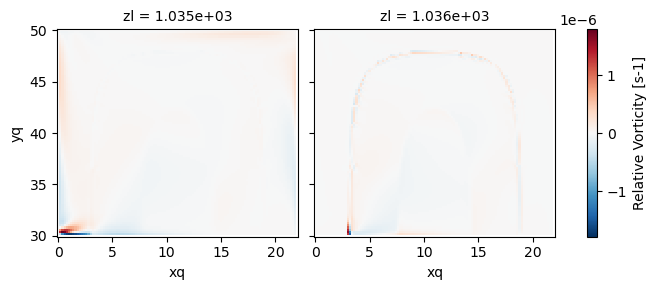

In [11]:
exp_DG_LR_ANN_Cp5['prog'].RV.isel(Time=0).plot(col='zl')

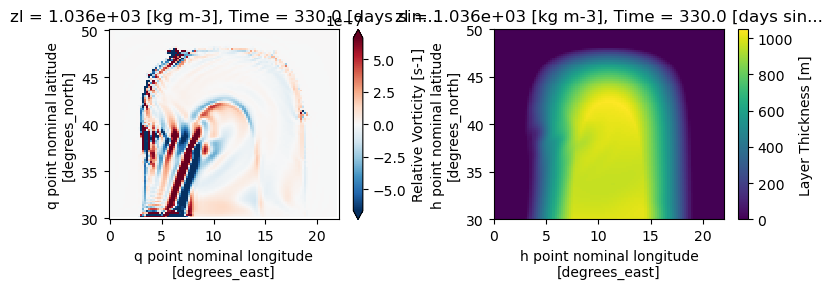

In [27]:
def plot(idT): 

    #idT = 65 
    zl = 1
    plt.figure(figsize=(8,3))
    
    plt.subplot(121)
    exp_DG_LR_ANN_C1_upslope_limit['prog'].RV.isel(Time=idT, zl=zl).plot(robust=True)
    
    plt.subplot(122)
    exp_DG_LR_ANN_C1_upslope_limit['prog'].h.isel(Time=idT, zl=zl).plot()
    exp_DG_LR_ANN_C1_upslope_limit['prog'].h.isel(Time=idT, zl=zl).plot.contour(levels=[0, 1])
    
    plt.tight_layout()    

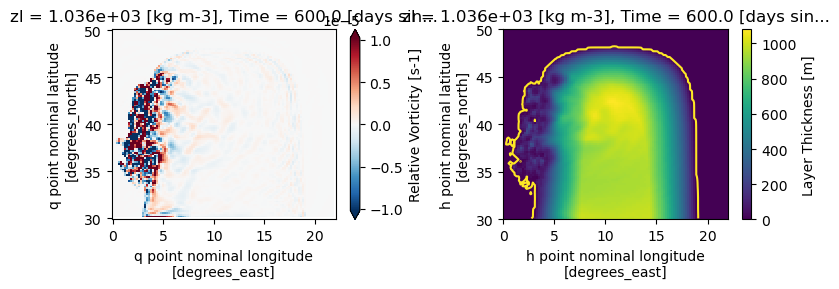

In [28]:
plot(-1)

In [28]:
def plot(idT): 

    #idT = 65 
    zl = 1
    plt.figure(figsize=(8,3))
    
    plt.subplot(121)
    exp_DG_LR_ANN_Cp5['prog'].RV.isel(Time=idT, zl=zl).plot(robust=True)
    
    plt.subplot(122)
    exp_DG_LR_ANN_Cp5['prog'].h.isel(Time=idT, zl=zl).plot()
    exp_DG_LR_ANN_Cp5['prog'].h.isel(Time=idT, zl=zl).plot.contour(levels=[0, 1])
    
    plt.tight_layout()    

In [43]:
def plot_C0(idT): 

    #idT = 65 
    zl = 1
    plt.figure(figsize=(8,3))
    
    plt.subplot(121)
    exp_DG_LR_ANN_C0['prog'].RV.isel(Time=idT, zl=zl).plot(robust=True)
    
    plt.subplot(122)
    exp_DG_LR_ANN_C0['prog'].h.isel(Time=idT, zl=zl).plot()
    exp_DG_LR_ANN_C0['prog'].h.isel(Time=idT, zl=zl).plot.contour(levels=[0, 1])
    
    plt.tight_layout()    

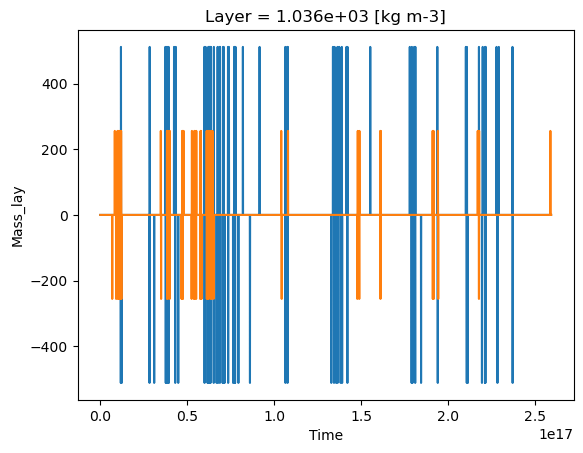

In [40]:
exp_DG_LR_ANN_C0['stat'].Mass_lay.isel(Layer=0).diff('Time').plot()
exp_DG_LR_ANN_C0['stat'].Mass_lay.isel(Layer=1).diff('Time').plot()

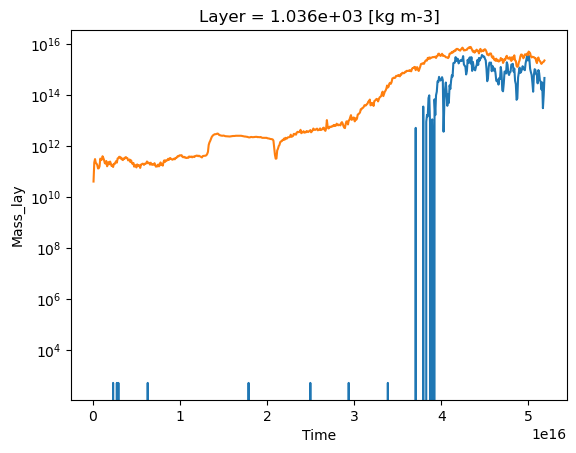

In [42]:
exp_DG_LR_ANN_Cp5['stat'].Mass_lay.isel(Layer=0).diff('Time').plot()
exp_DG_LR_ANN_Cp5['stat'].Mass_lay.isel(Layer=1).diff('Time').plot()
plt.yscale('log')

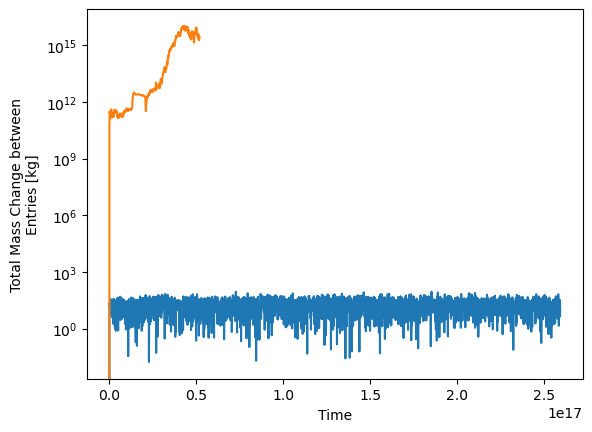

In [35]:
np.abs(exp_DG_LR_ANN_C0['stat'].Mass_chg).plot()
np.abs(exp_DG_LR_ANN_Cp5['stat'].Mass_chg).plot()
plt.yscale('log')

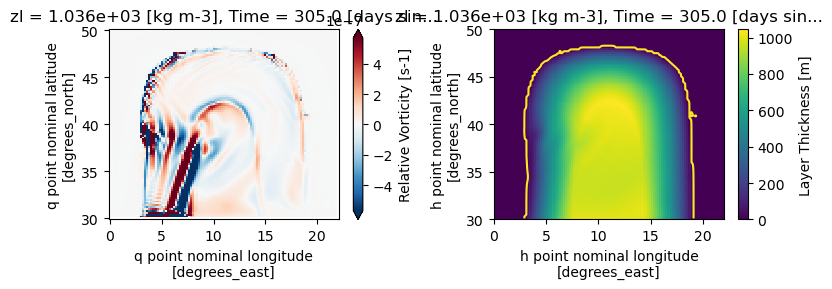

In [30]:
plot(60)

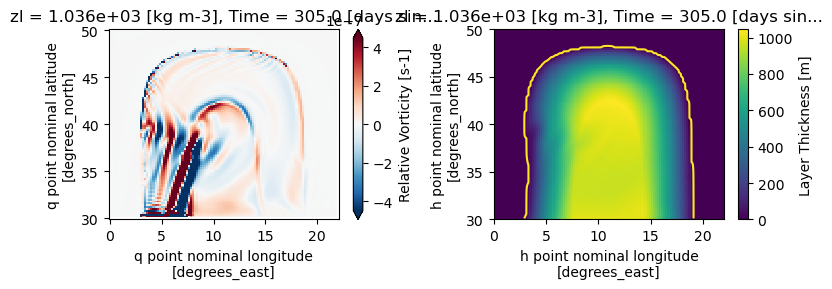

In [44]:
plot_C0(60)

In [29]:
create_animation(plot, range(0,100), 'DG.gif', dpi=100, FPS=6)

Animation at FPS=6 will last for 16.666666666666668 seconds


In [45]:
create_animation(plot_C0, range(0,100), 'DG_C0.gif', dpi=100, FPS=6)

Animation at FPS=6 will last for 16.666666666666668 seconds


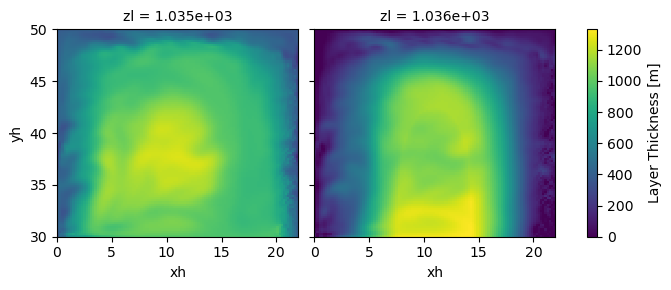

In [112]:
exp_DG_LR_ANN_C1['prog'].h.isel(Time=-1).plot(col='zl')

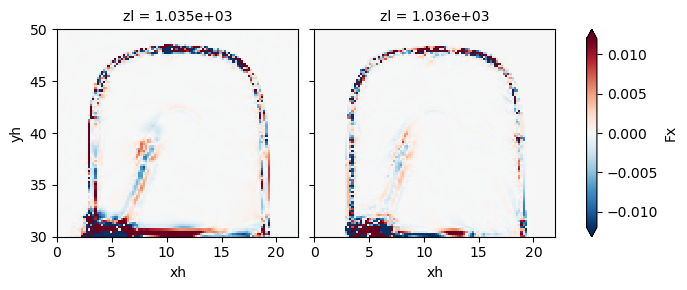

In [91]:
(ds_C0.Fx - ds_C1.Fx).isel(Time=-1).plot(col='zl', robust=True)

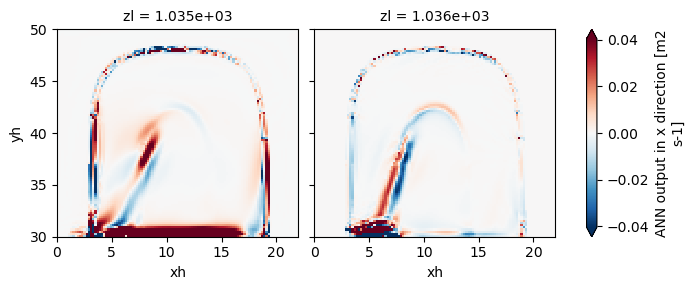

In [102]:
ds_C0.Fx.isel(Time=-1).plot(col='zl', robust=True)

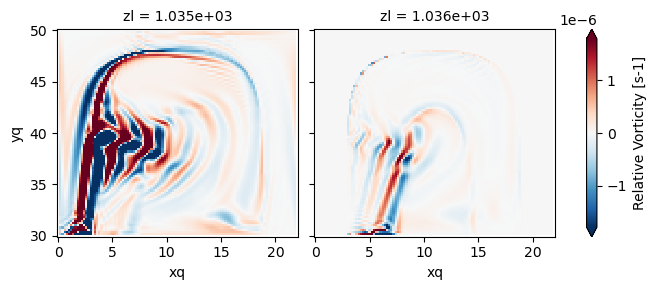

In [107]:
ds_LR.RV.isel(Time=-1).plot(col='zl', robust=True)

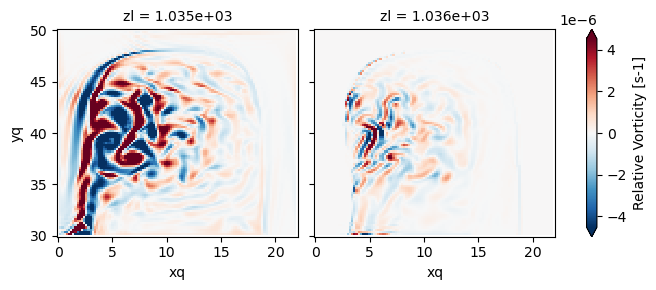

In [108]:
exp_DG_LR['prog'].RV.isel(Time=-1).plot(col='zl', robust=True)

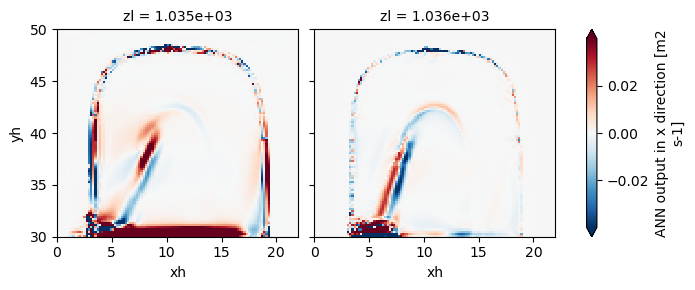

In [90]:
ds_C1.Fx.isel(Time=-1).plot(col='zl', robust=True)

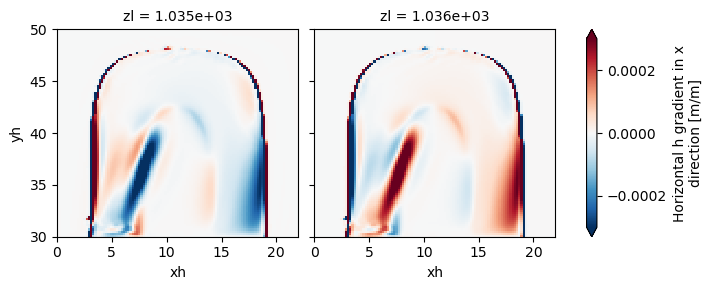

In [92]:
ds_C1.dhdx.isel(Time=-1).plot(col='zl', robust=True)

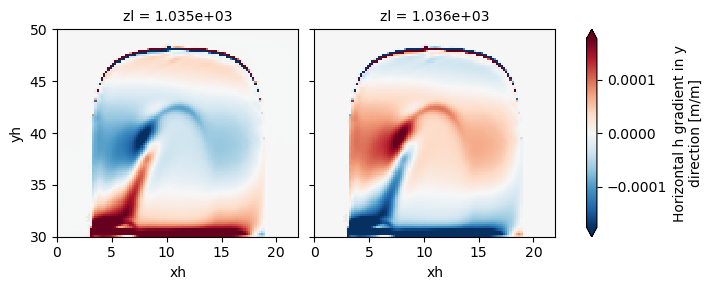

In [93]:
ds_C1.dhdy.isel(Time=-1).plot(col='zl', robust=True)

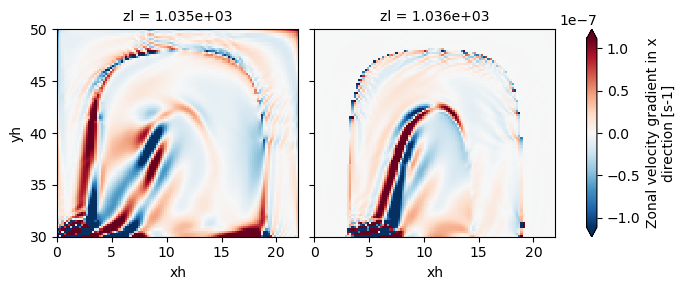

In [96]:
ds_C0.dudx.isel(Time=-1).plot(col='zl', robust=True)

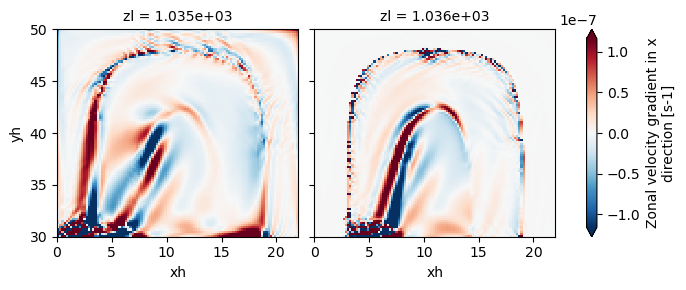

In [94]:
ds_C1.dudx.isel(Time=-1).plot(col='zl', robust=True)

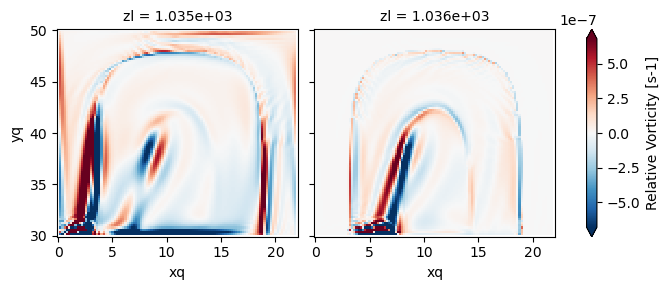

In [97]:
ds_C0.RV.isel(Time=-1).plot(col='zl', robust=True)

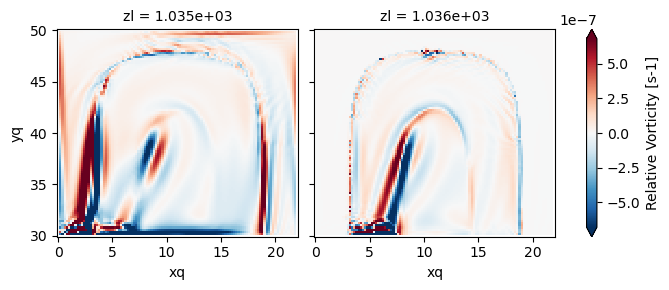

In [98]:
ds_C1.RV.isel(Time=-1).plot(col='zl', robust=True)

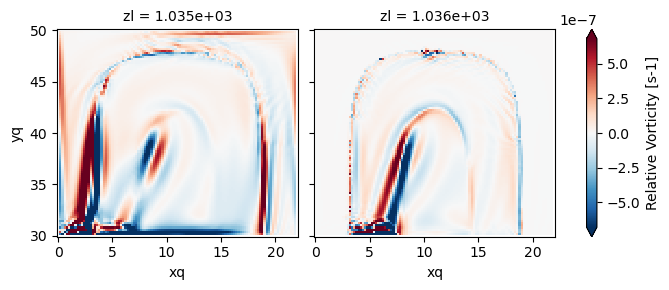

In [100]:
ds_C1.RV.isel(Time=-1).plot(col='zl', robust=True)

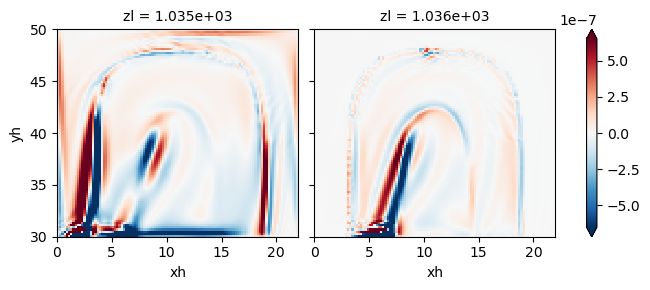

In [99]:
(ds_C1.dvdx - ds_C1.dudy).isel(Time=-1).plot(col='zl', robust=True)

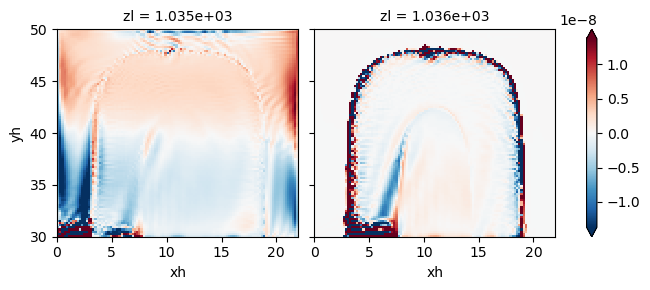

In [101]:
(ds_C1.dudx + ds_C1.dvdy).isel(Time=-1).plot(col='zl', robust=True)

In [8]:
ds_dic = {'HR': exp_DG_HR,
          'LR': exp_DG_LR,
          'LR_ANN_C0': exp_DG_LR_ANN_C0}

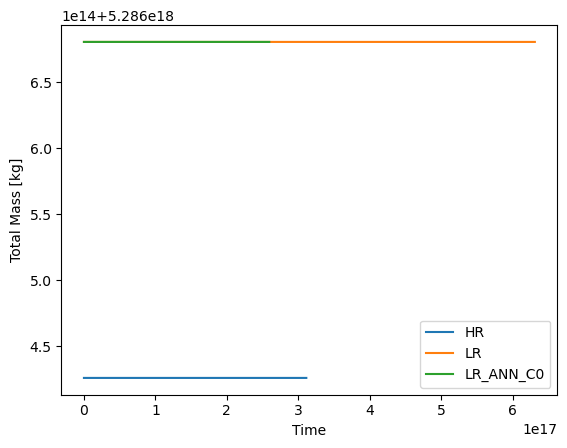

In [9]:
for k in ds_dic.keys():
    ds_dic[k]['stat'].Mass.plot(label=k)

plt.legend()

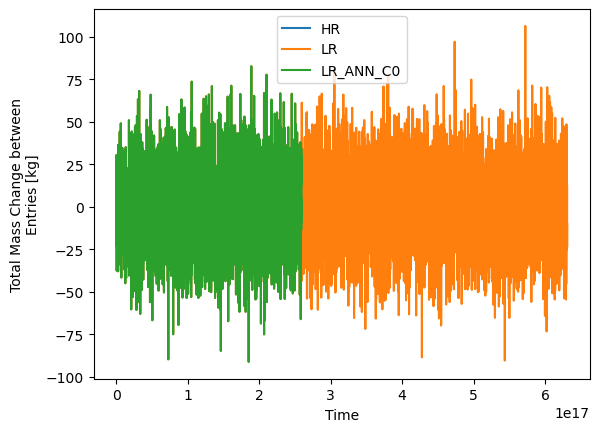

In [48]:
for k in ds_dic.keys():
    ds_dic[k]['stat'].Mass_chg.plot(label=k)

#exp_DG_LR_ANN_C1['stat'].Mass_chg[0:50].plot(label=k)
plt.legend()
#

In [42]:
ds_dic[k]['stat']

<xarray.Dataset>
Dimensions:        (Layer: 2, Interface: 3, Time: 3001)
Coordinates:
  * Layer          (Layer) float64 1.035e+03 1.036e+03
  * Interface      (Interface) float64 1.034e+03 1.036e+03 1.037e+03
  * Time           (Time) timedelta64[ns] 0 days 1 days ... 2999 days 3000 days
Data variables:
    Ntrunc         (Time) float64 ...
    En             (Time) float64 ...
    APE            (Time, Interface) float64 2.342e-06 7.54e+05 ... 0.0
    KE             (Time, Layer) float64 0.0 0.0 ... 1.25e+16 7.529e+14
    H0             (Time, Interface) float64 ...
    Mass_lay       (Time, Layer) float64 ...
    Mass           (Time) float64 ...
    Mass_chg       (Time) float64 ...
    Mass_anom      (Time) float64 ...
    max_CFL_trans  (Time) float64 ...
    max_CFL_lin    (Time) float64 ...
Attributes:
    filename:  ./ocean.stats.nc

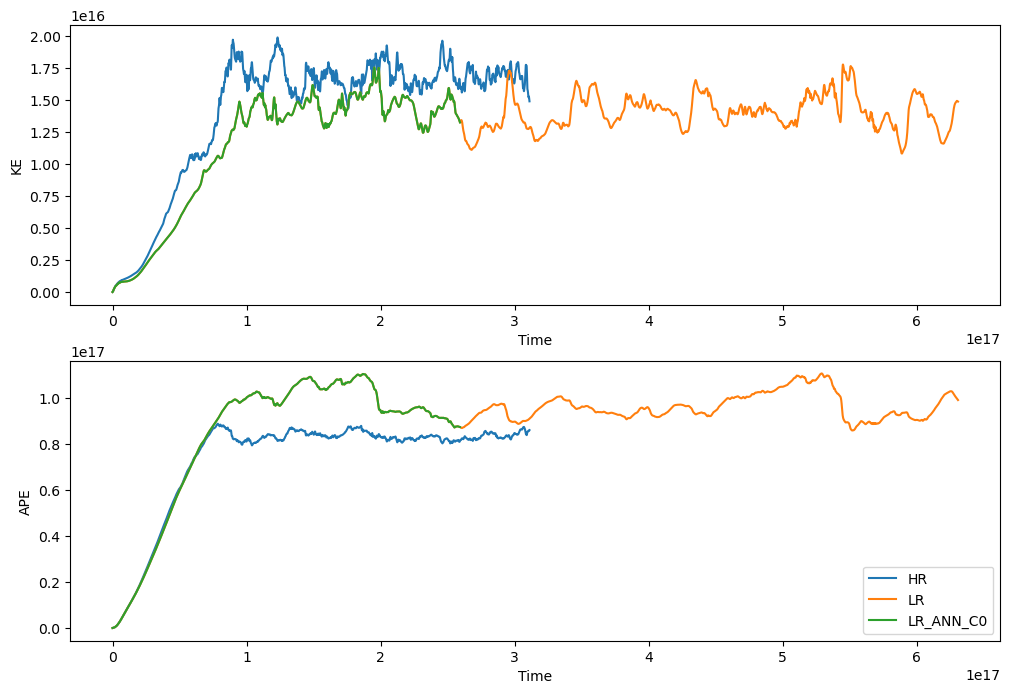

In [10]:
plt.figure(figsize=(12, 8))

plt.subplot(211)
for k in ds_dic.keys():
    ds_dic[k]['stat'].KE.sum('Layer').plot(label=k)



plt.subplot(212)
for k in ds_dic.keys():
    ds_dic[k]['stat'].APE.sum('Interface').plot(label=k)

plt.legend()

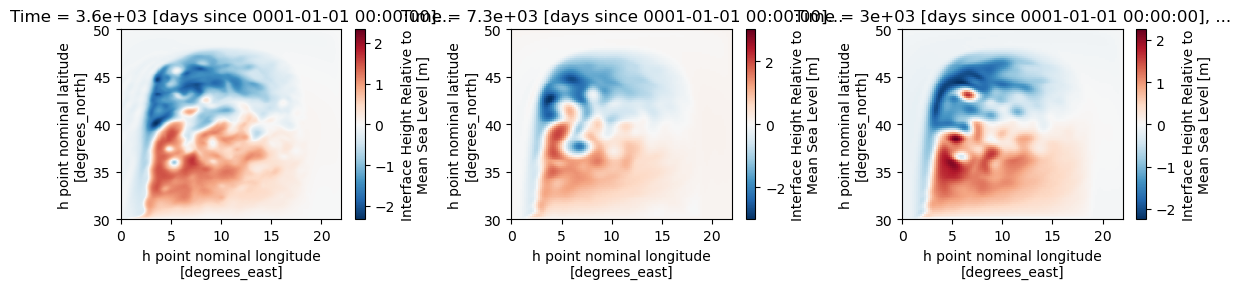

In [11]:
plt.figure(figsize=(12, 3))

plt.subplot(131)
exp_DG_HR['prog'].e.isel(Time=-1, zi=0).plot()

plt.subplot(132)
exp_DG_LR['prog'].e.isel(Time=-1, zi=0).plot()

plt.subplot(133)
exp_DG_LR_ANN_C0['prog'].e.isel(Time=-1, zi=0).plot()

plt.tight_layout()

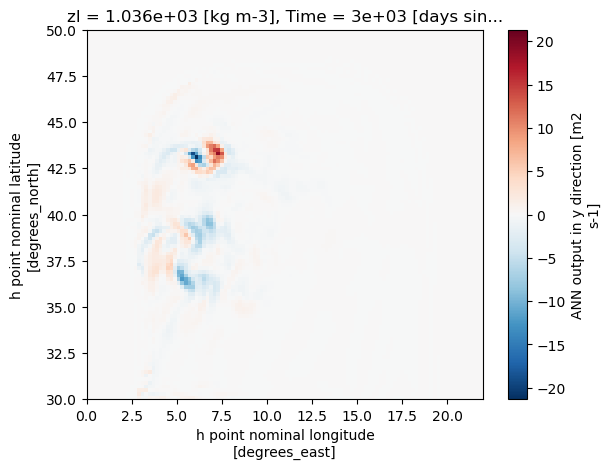

In [13]:
exp_DG_LR_ANN_C0['prog'].Fy.isel(Time=-1, zl=1).plot()

In [22]:
def magF(ds): 
    return (ds.Fy**2 + ds.Fx**2)**0.5

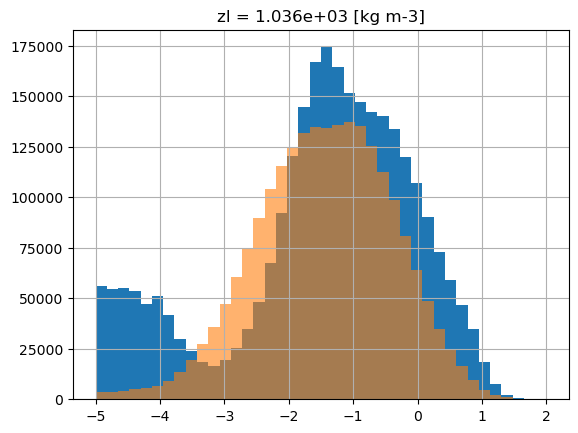

In [30]:
bins = np.linspace(-5, 2, 41)
np.log10(magF(exp_DG_LR_ANN_C0['prog'])).isel(Time=slice(-300,None),zl=0).plot(bins=bins)
np.log10(magF(exp_DG_LR_ANN_C0['prog'])).isel(Time=slice(-300,None),zl=1).plot(bins=bins, alpha=0.6)
plt.grid()

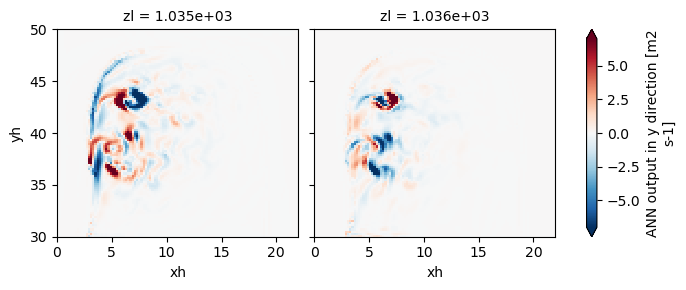

In [31]:
exp_DG_LR_ANN_C0['prog'].Fy.isel(Time=-1).plot(col='zl', vmin=-7)

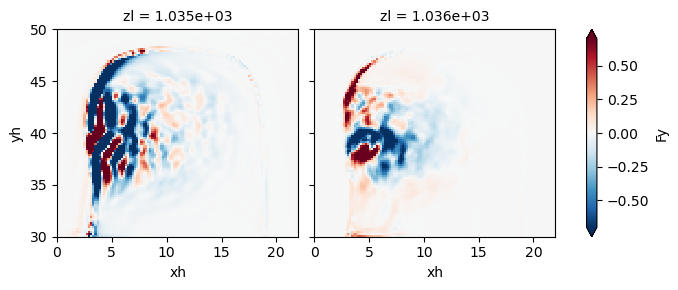

In [20]:
exp_DG_LR_ANN_C0['prog'].Fy.isel(Time=slice(300, 600)).mean('Time').plot(col='zl', vmin=-.7)

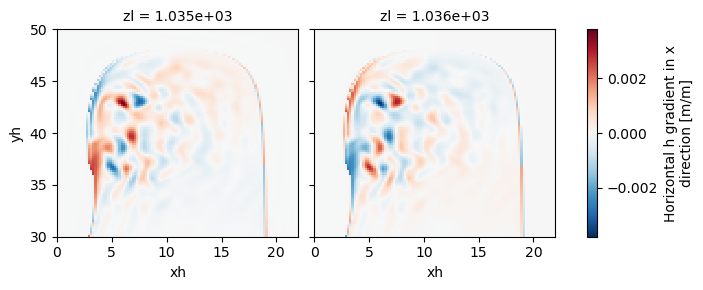

In [50]:
exp_DG_LR_ANN_C0['prog'].dhdx.isel(Time=-1).plot(col='zl')

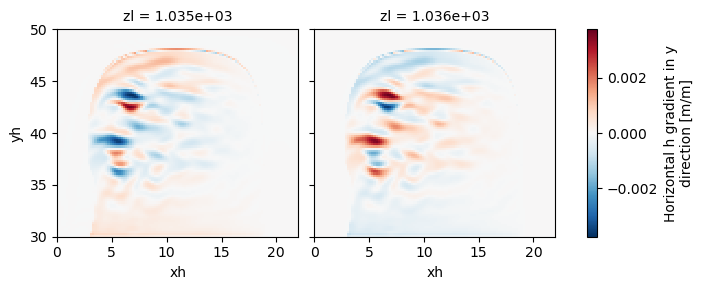

In [51]:
exp_DG_LR_ANN_C0['prog'].dhdy.isel(Time=-1).plot(col='zl')

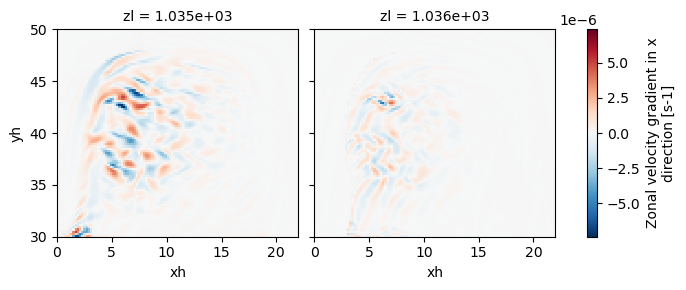

In [52]:
exp_DG_LR_ANN_C0['prog'].dudx.isel(Time=-1).plot(col='zl')

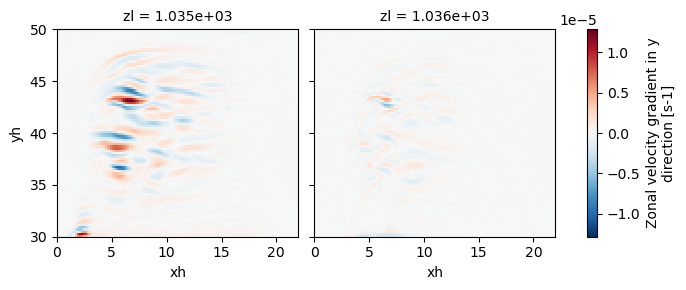

In [53]:
exp_DG_LR_ANN_C0['prog'].dudy.isel(Time=-1).plot(col='zl')

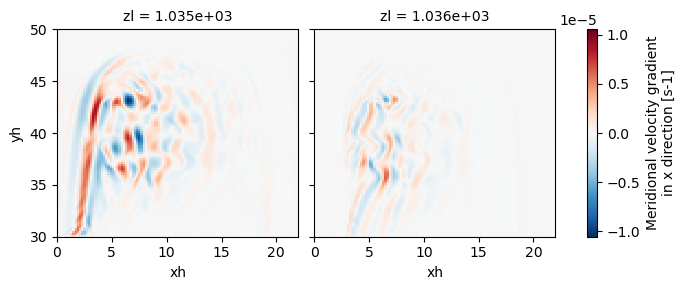

In [54]:
exp_DG_LR_ANN_C0['prog'].dvdx.isel(Time=-1).plot(col='zl')

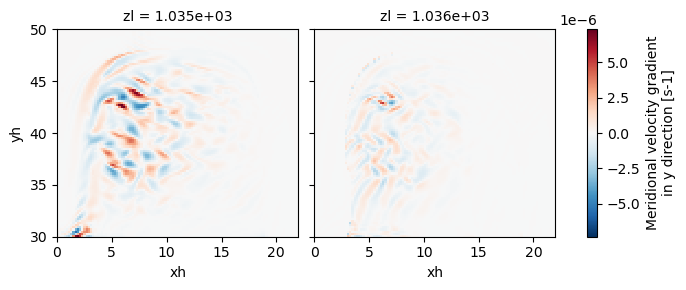

In [55]:
exp_DG_LR_ANN_C0['prog'].dvdy.isel(Time=-1).plot(col='zl')

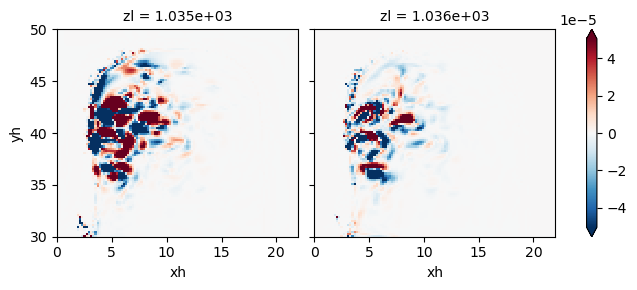

In [21]:
(exp_DG_ANN['prog'].dhdx*exp_DG_ANN['prog'].Fx + exp_DG_ANN['prog'].dhdy*exp_DG_ANN['prog'].Fy ).isel(Time=2000).plot(col='zl', robust=True)


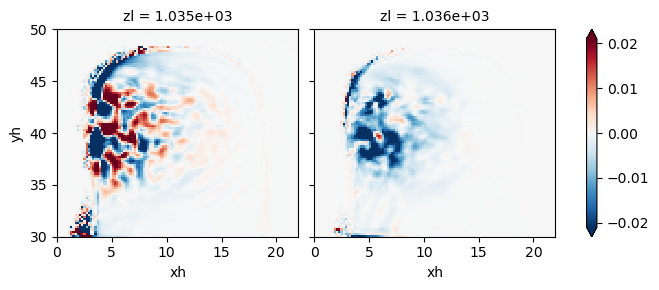

In [25]:
grad_h_mag = (exp_DG_ANN['prog'].dhdx**2 + exp_DG_ANN['prog'].dhdy**2)**0.5
((exp_DG_ANN['prog'].dhdx*exp_DG_ANN['prog'].Fx + exp_DG_ANN['prog'].dhdy*exp_DG_ANN['prog'].Fy )/ grad_h_mag) .isel(Time=slice(2000, 3000)).mean('Time').plot(col='zl', robust=True)



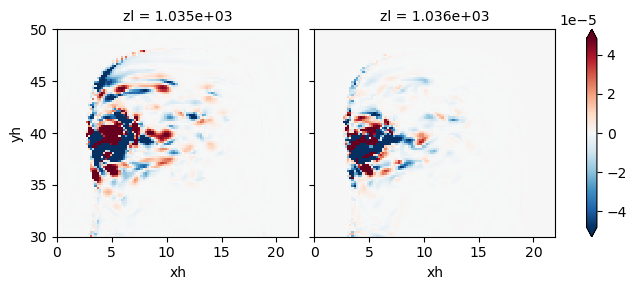

In [23]:
(exp_DG_no_ANN['prog'].dhdx*exp_DG_no_ANN['prog'].Fx + exp_DG_no_ANN['prog'].dhdy*exp_DG_no_ANN['prog'].Fy ).isel(Time=2000).plot(col='zl', robust=True)


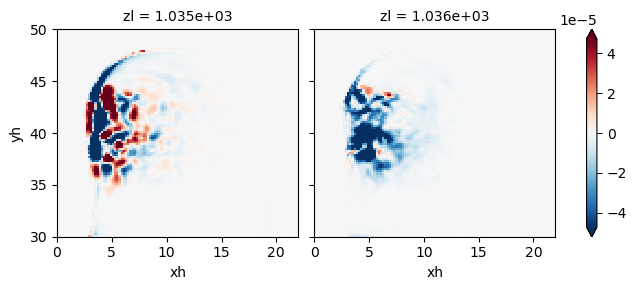

In [24]:

(exp_DG_no_ANN['prog'].dhdx*exp_DG_no_ANN['prog'].Fx + exp_DG_no_ANN['prog'].dhdy*exp_DG_no_ANN['prog'].Fy ).isel(Time=slice(2000, 3000)).mean('Time').plot(col='zl', robust=True)


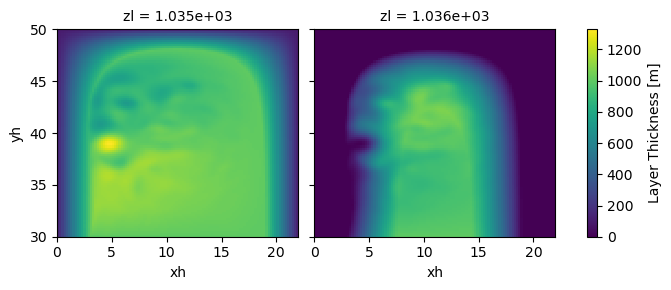

In [15]:
exp_DG_ANN['prog'].h.isel(Time=-1).plot(col='zl')

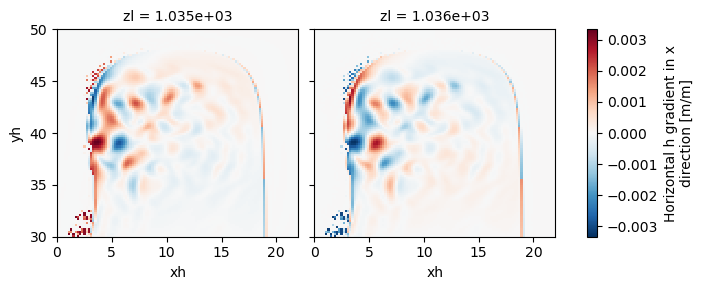

In [30]:
exp_DG_ANN['prog'].dhdx.isel(Time=-1).plot(col='zl')

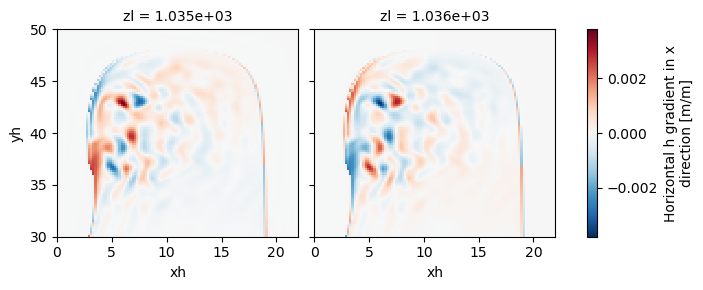

In [31]:
exp_DG_no_ANN['prog'].dhdx.isel(Time=-1).plot(col='zl')

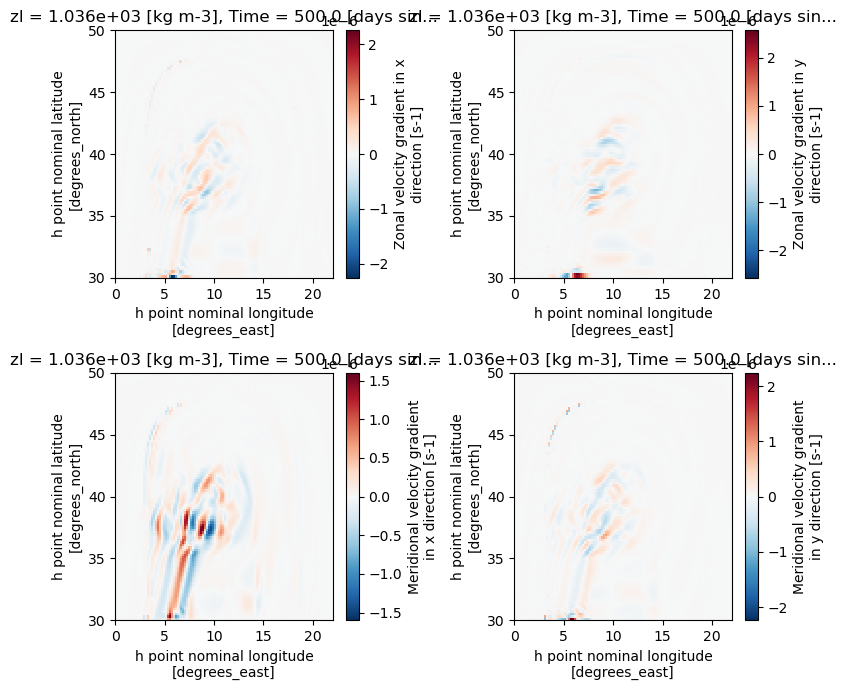

In [51]:
plt.figure(figsize=(8,7))

zl = 1
plt.subplot(221)
exp_DG['prog'].dudx.isel(Time=-1, zl=zl).plot()

plt.subplot(222)
exp_DG['prog'].dudy.isel(Time=-1, zl=zl).plot()

plt.subplot(223)
exp_DG['prog'].dvdx.isel(Time=-1, zl=zl).plot()

plt.subplot(224)
exp_DG['prog'].dvdy.isel(Time=-1, zl=zl).plot()

plt.tight_layout()

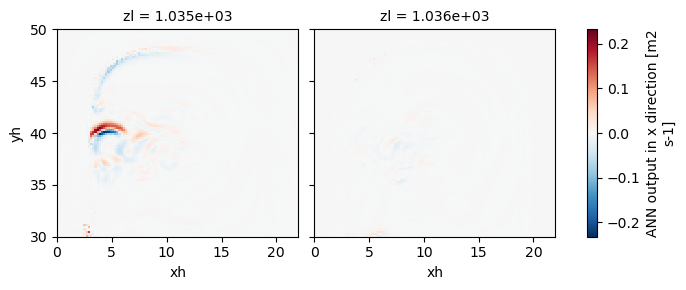

In [52]:
exp_DG['prog'].Fx.isel(Time=-1).plot(col='zl')

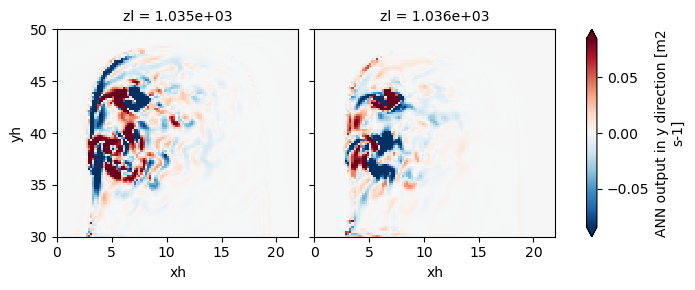

In [13]:
exp_DG_no_ANN['prog'].Fy.isel(Time=-1).plot(col='zl', robust=True)

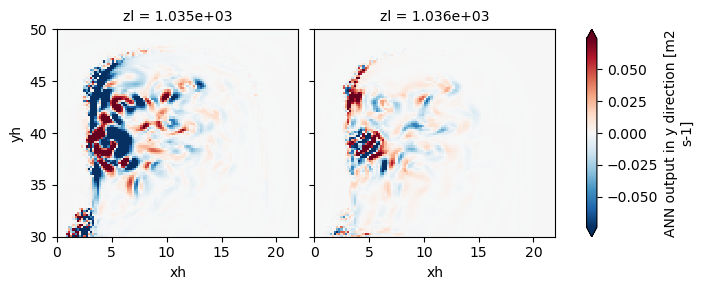

In [14]:
exp_DG_ANN['prog'].Fy.isel(Time=-1).plot(col='zl', robust=True)

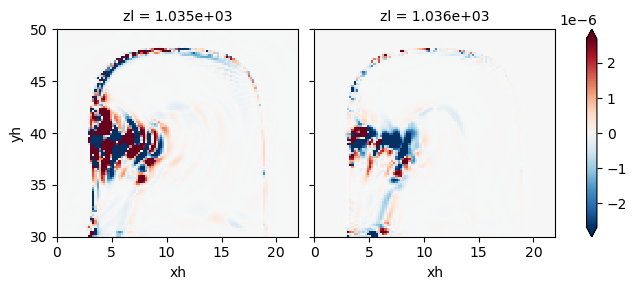

In [64]:
(exp_DG['prog'].dhdx*exp_DG['prog'].Fx + exp_DG['prog'].dhdy*exp_DG['prog'].Fy ).isel(Time=350).plot(col='zl', robust=True)

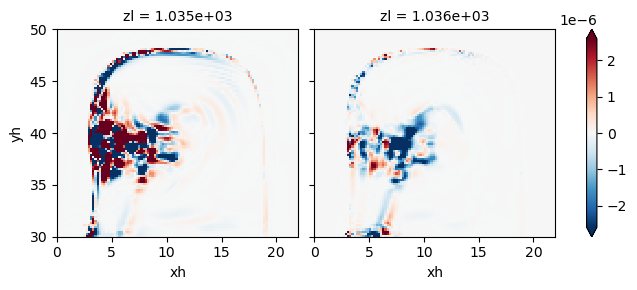

In [65]:
(exp_DG['prog'].dhdx*exp_DG['prog'].Fx + exp_DG['prog'].dhdy*exp_DG['prog'].Fy ).isel(Time=slice(350, 500)).mean('Time').plot(col='zl', robust=True)

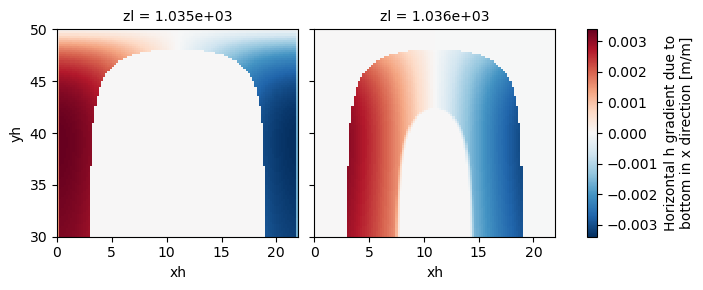

In [54]:
exp_DG['prog'].dhbardx.isel(Time=0).plot(col='zl')

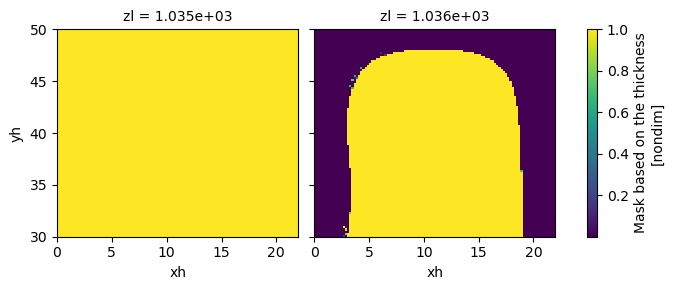

In [55]:
exp_DG['prog'].h_mask.isel(Time=-1).plot(col='zl')

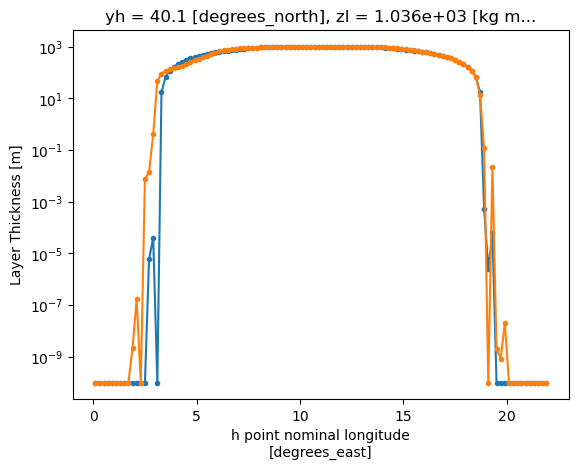

In [56]:
exp_DG['prog'].h.isel(Time=0, zl=1).sel(yh=40, method='nearest').plot(marker='.')
exp_DG['prog'].h.isel(Time=-1, zl=1).sel(yh=40, method='nearest').plot(marker='.')
plt.yscale('log')

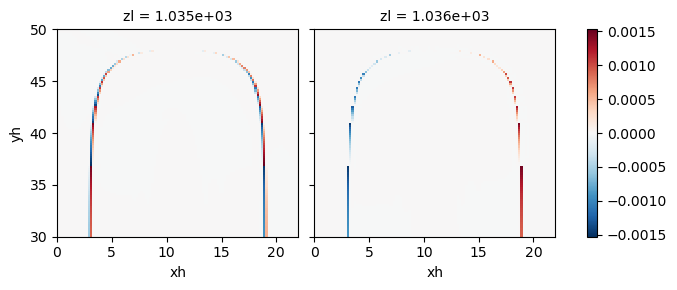

In [57]:
(exp_DG['prog'].dhdx*exp_DG['prog'].h_mask).isel(Time=0).plot(col='zl')

In [3]:
exp_ANN_no_decompose = load_data('/scratch/db194/mom6/mar2025/phillips2layer/Phillips_2layer_ann_nondim_test_2/')

ERROR 1: PROJ: proj_create_from_database: Open of /ext3/miniforge/share/proj failed


In [4]:
exp_ANN_decompose = load_data('/scratch/db194/mom6/mar2025/phillips2layer/Phillips_2layer_ann_nondim_test_3/')

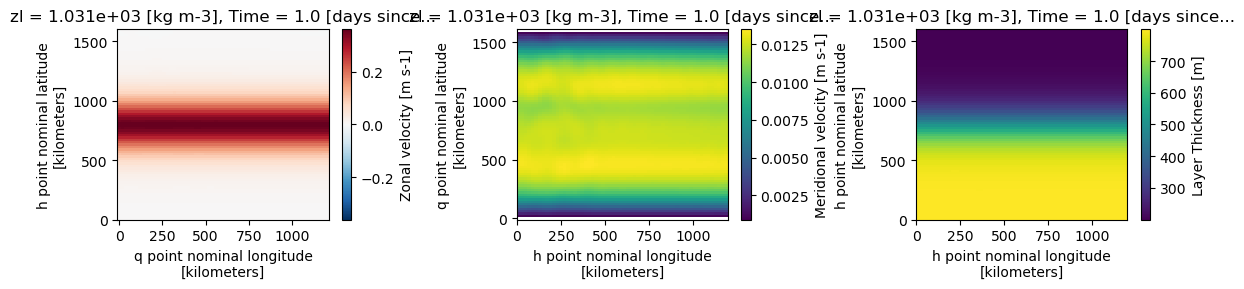

In [5]:
plt.figure(figsize=(12,3))

plt.subplot(131)
exp_ANN_decompose['prog'].u.isel(Time=0, zl=0).plot()

plt.subplot(132)
exp_ANN_decompose['prog'].v.isel(Time=0, zl=0).plot()

plt.subplot(133)
exp_ANN_decompose['prog'].h.isel(Time=0, zl=0).plot()

plt.tight_layout()

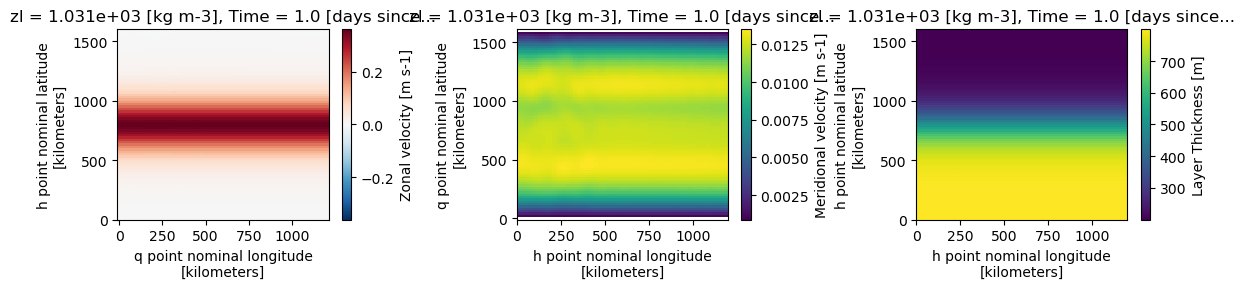

In [6]:
plt.figure(figsize=(12,3))

plt.subplot(131)
exp_ANN_no_decompose['prog'].u.isel(Time=0, zl=0).plot()

plt.subplot(132)
exp_ANN_no_decompose['prog'].v.isel(Time=0, zl=0).plot()

plt.subplot(133)
exp_ANN_no_decompose['prog'].h.isel(Time=0, zl=0).plot()

plt.tight_layout()

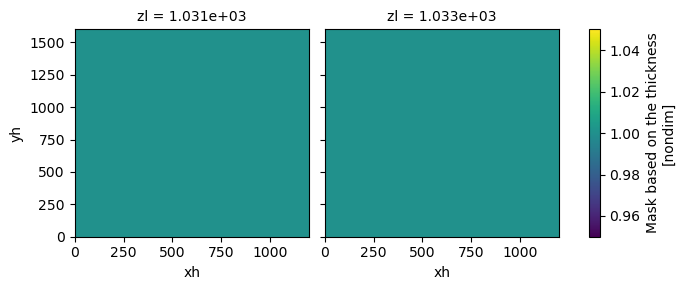

In [9]:
exp_ANN_decompose['prog'].h_mask.isel(Time=-1).plot(col='zl')

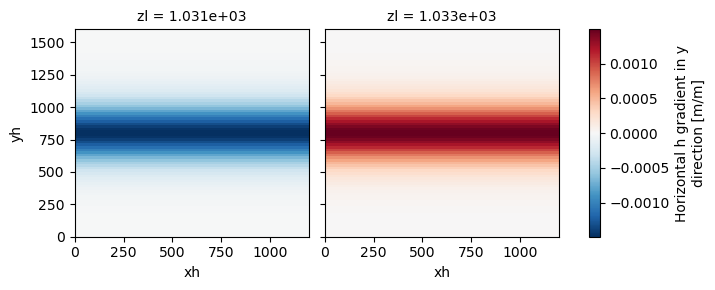

In [10]:
exp_ANN_decompose['prog'].dhdy.isel(Time=-1).plot(col='zl')

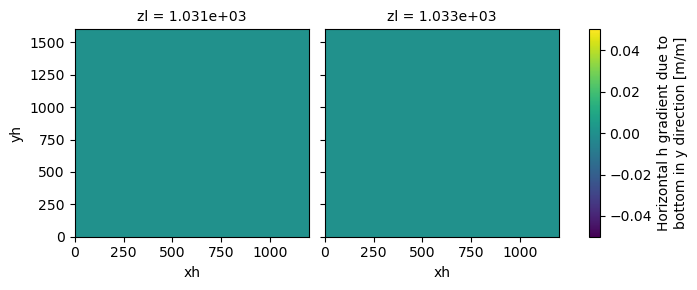

In [11]:
exp_ANN_decompose['prog'].dhbardy.isel(Time=-1).plot(col='zl')

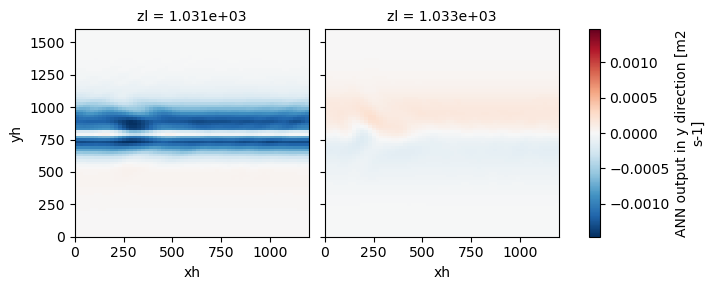

In [13]:
exp_ANN_decompose['prog'].Fy.isel(Time=-1).plot(col='zl')

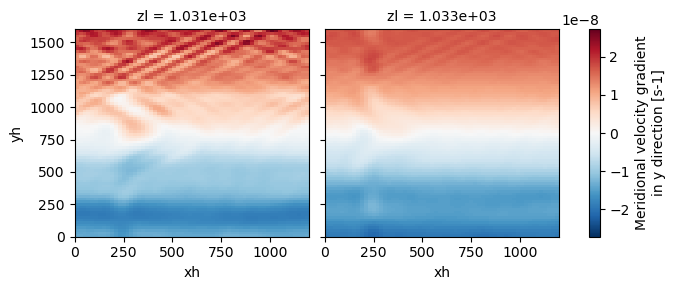

In [19]:
exp_ANN_decompose['prog'].dvdy.isel(Time=-1).plot(col='zl')

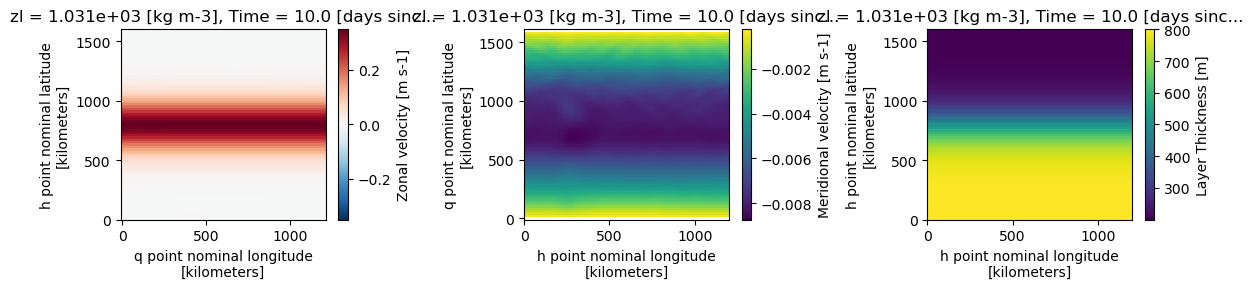

In [39]:
plt.figure(figsize=(12,3))

plt.subplot(131)
exp_ANN['prog'].u.isel(Time=0, zl=0).plot()

plt.subplot(132)
exp_ANN['prog'].v.isel(Time=0, zl=0).plot()

plt.subplot(133)
exp_ANN['prog'].h.isel(Time=0, zl=0).plot()

plt.tight_layout()

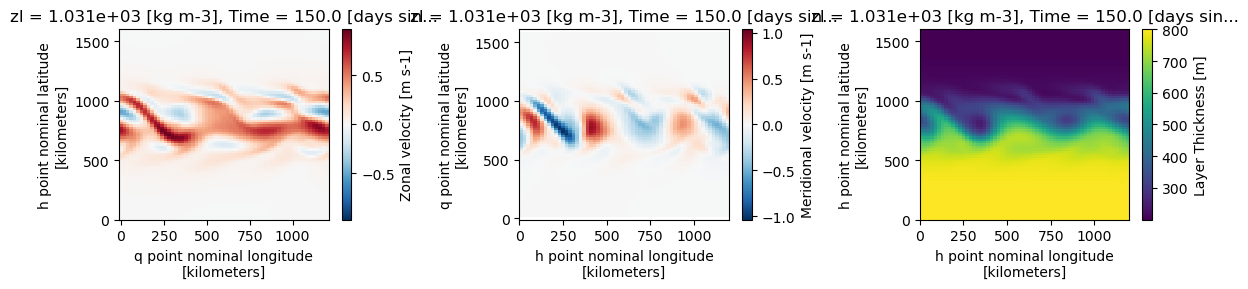

In [40]:
plt.figure(figsize=(12,3))

plt.subplot(131)
exp_ANN['prog'].u.isel(Time=-1, zl=0).plot()

plt.subplot(132)
exp_ANN['prog'].v.isel(Time=-1, zl=0).plot()

plt.subplot(133)
exp_ANN['prog'].h.isel(Time=-1, zl=0).plot()

plt.tight_layout()

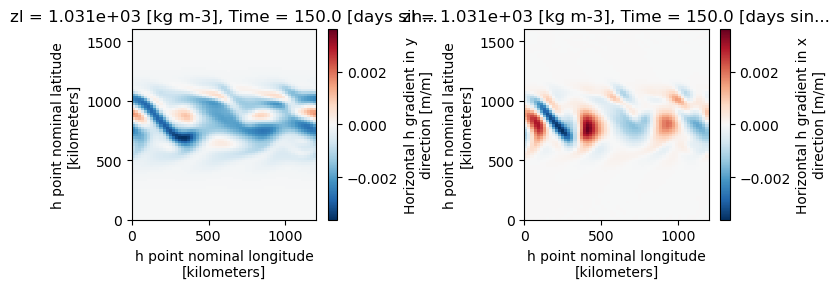

In [41]:
plt.figure(figsize=(8,3))

plt.subplot(121)
exp_ANN['prog'].dhdy.isel(Time=-1, zl=0).plot()

plt.subplot(122)
exp_ANN['prog'].dhdx.isel(Time=-1, zl=0).plot()

plt.tight_layout()

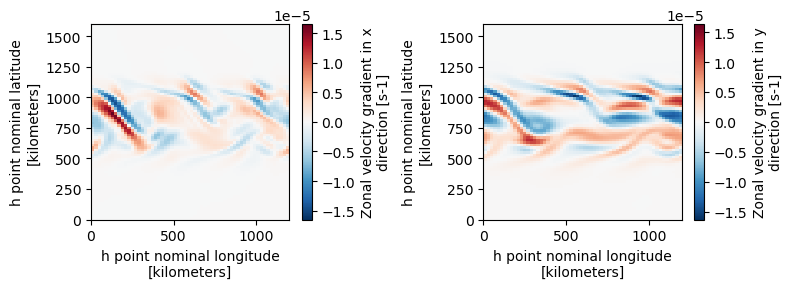

In [42]:
plt.figure(figsize=(8,3))

plt.subplot(121)
exp_ANN['prog'].dudx.isel(Time=-1, zl=0).plot()
plt.title('')


plt.subplot(122)
exp_ANN['prog'].dudy.isel(Time=-1, zl=0).plot()
plt.title('')

plt.tight_layout()

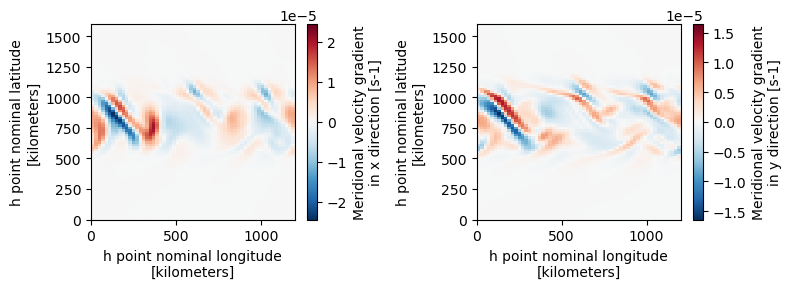

In [43]:
plt.figure(figsize=(8,3))

plt.subplot(121)
exp_ANN['prog'].dvdx.isel(Time=-1, zl=0).plot()
plt.title('')


plt.subplot(122)
exp_ANN['prog'].dvdy.isel(Time=-1, zl=0).plot()
plt.title('')

plt.tight_layout()

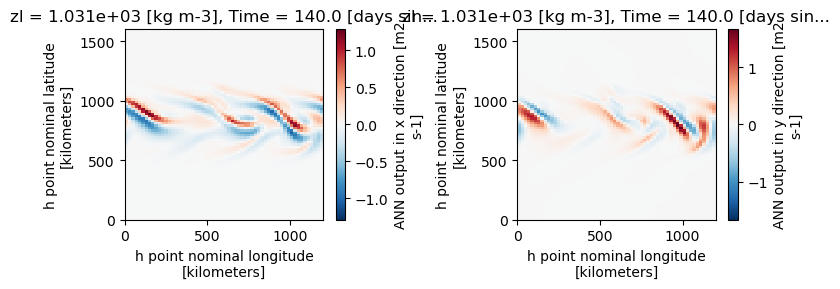

In [44]:
plt.figure(figsize=(8,3))

plt.subplot(121)
exp_ANN['prog'].Fx.isel(Time=-2, zl=0).plot()

plt.subplot(122)
exp_ANN['prog'].Fy.isel(Time=-2, zl=0).plot()

plt.tight_layout()

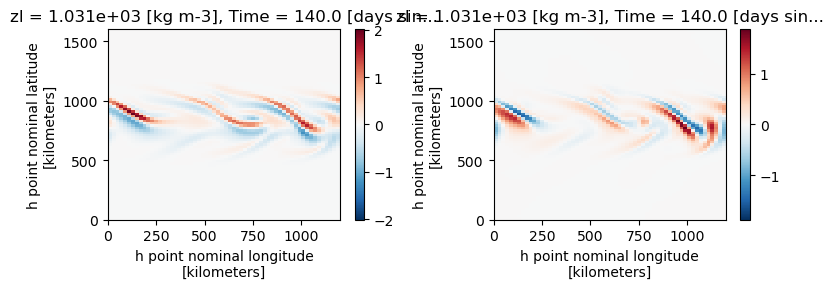

In [45]:
plt.figure(figsize=(8,3))

plt.subplot(121)
((0.1*20e3**2)*(exp_ANN['prog'].dudx * exp_ANN['prog'].dhdx + exp_ANN['prog'].dudy * exp_ANN['prog'].dhdy)).isel(Time=-2, zl=0).plot()

plt.subplot(122)
((0.1*20e3**2)*(exp_ANN['prog'].dvdx * exp_ANN['prog'].dhdx + exp_ANN['prog'].dvdy * exp_ANN['prog'].dhdy)).isel(Time=-2, zl=0).plot()

plt.tight_layout()

In [3]:
exp_GM = load_data('/scratch/db194/mom6/mar2025/phillips2layer/Phillips_2layer_GM_test/')

ERROR 1: PROJ: proj_create_from_database: Open of /ext3/miniforge/share/proj failed


In [4]:
exp_ANN_GM = load_data('/scratch/db194/mom6/mar2025/phillips2layer/Phillips_2layer_GMann_test/')

In [5]:
exp_ANN_GM_rot = load_data('/scratch/db194/mom6/mar2025/phillips2layer/Phillips_2layer_GMann_rot_nondim_test/')

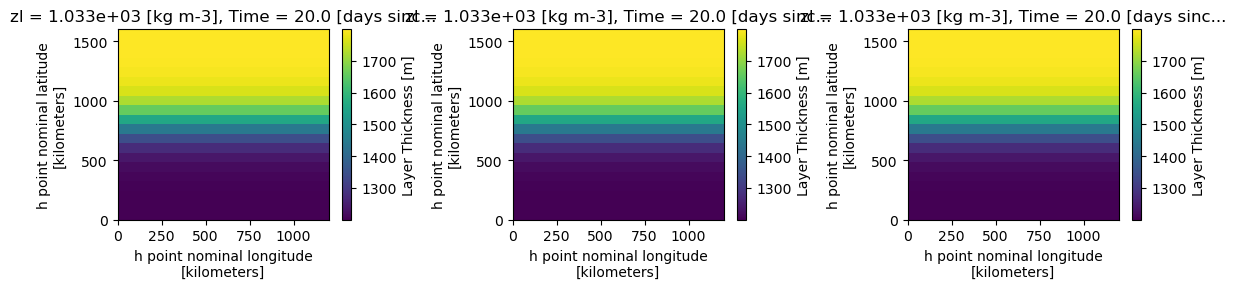

In [6]:
plt.figure(figsize=(12, 3))

plt.subplot(131)
exp_GM['prog'].h.isel(zl=1, Time=-1).plot()

plt.subplot(132)
exp_ANN_GM['prog'].h.isel(zl=1, Time=-1).plot()

plt.subplot(133)
exp_ANN_GM_rot['prog'].h.isel(zl=1, Time=-1).plot()


plt.tight_layout()

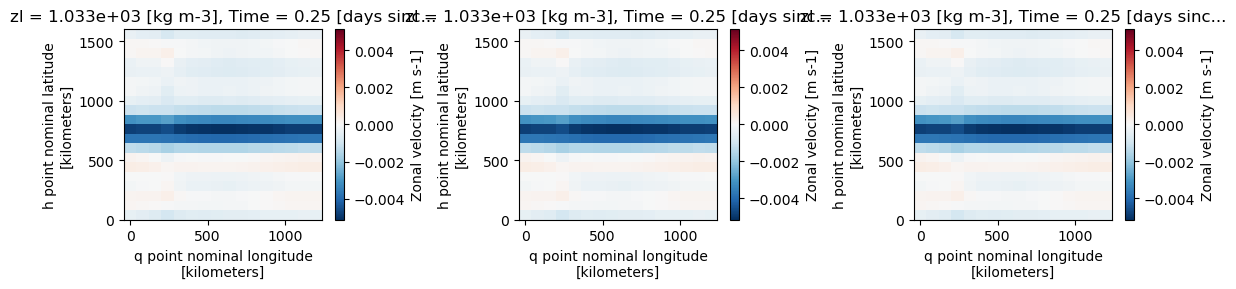

In [7]:
plt.figure(figsize=(12, 3))

idT = 0

plt.subplot(131)
exp_GM['prog'].u.isel(zl=1, Time=idT).plot()

plt.subplot(132)
exp_ANN_GM['prog'].u.isel(zl=1, Time=idT).plot()

plt.subplot(133)
exp_ANN_GM_rot['prog'].u.isel(zl=1, Time=idT).plot()

plt.tight_layout()

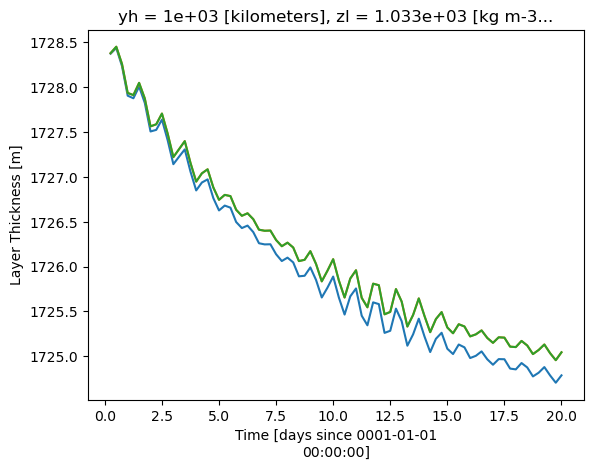

In [9]:
exp_GM['prog'].h.isel(zl=1).sel(xh=250, yh=1000, method='nearest').plot()
exp_ANN_GM['prog'].h.isel(zl=1).sel(xh=250, yh=1000, method='nearest').plot()
exp_ANN_GM_rot['prog'].h.isel(zl=1).sel(xh=250, yh=1000, method='nearest').plot()

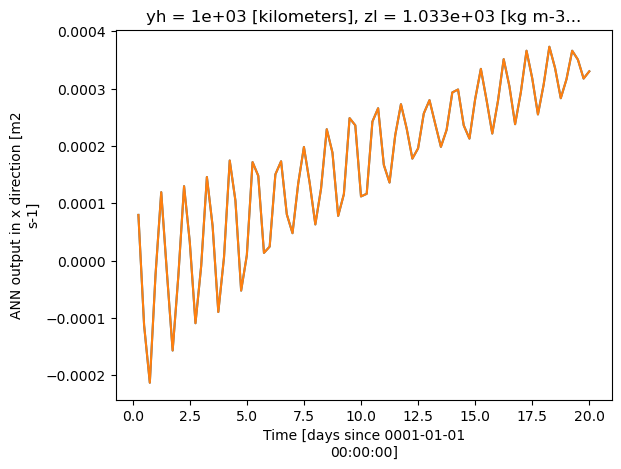

In [11]:
exp_ANN_GM_rot['prog'].Fx.isel(zl=1).sel(xh=250, yh=1000, method='nearest').plot()
exp_ANN_GM['prog'].Fx.isel(zl=1).sel(xh=250, yh=1000, method='nearest').plot()

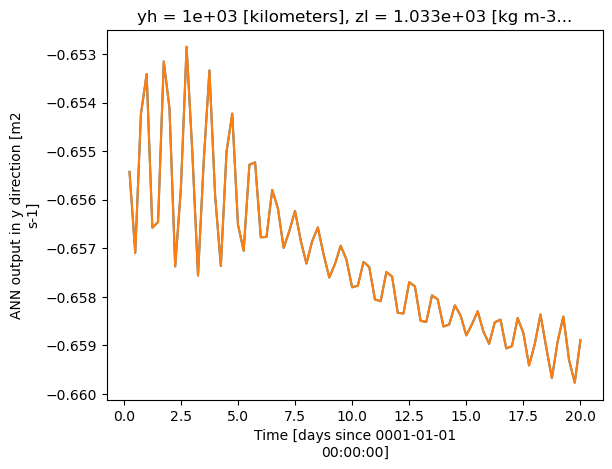

In [12]:
exp_ANN_GM_rot['prog'].Fy.isel(zl=1).sel(xh=250, yh=1000, method='nearest').plot()
exp_ANN_GM['prog'].Fy.isel(zl=1).sel(xh=250, yh=1000, method='nearest').plot()

### Old

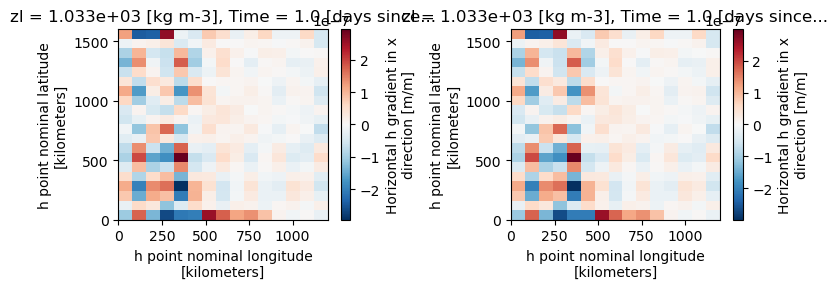

In [126]:
plt.figure(figsize=(8, 3))

plt.subplot(121)
exp_ANN['prog'].dhdx.isel(zl=1, Time=-1).plot()

plt.subplot(122)
exp_ANN_4core['prog'].dhdx.isel(zl=1, Time=-1).plot()

plt.tight_layout()

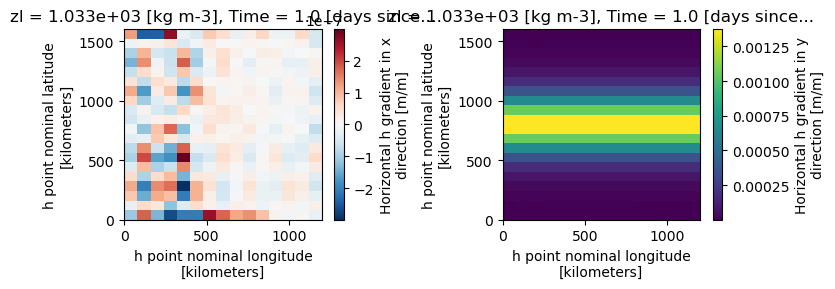

In [127]:
plt.figure(figsize=(8, 3))

plt.subplot(121)
exp_ANN_4core['prog'].dhdx.isel(zl=1, Time=-1).plot()

plt.subplot(122)
exp_ANN_4core['prog'].dhdy.isel(zl=1, Time=-1).plot()

plt.tight_layout()

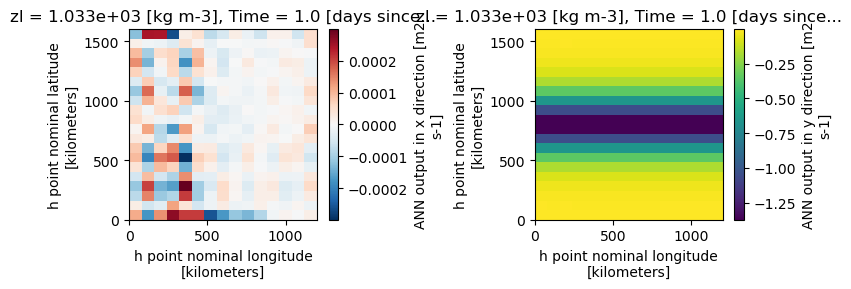

In [128]:
plt.figure(figsize=(8, 3))

plt.subplot(121)
exp_ANN_4core['prog'].Fx.isel(zl=1, Time=-1).plot()

plt.subplot(122)
exp_ANN_4core['prog'].Fy.isel(zl=1, Time=-1).plot()

plt.tight_layout()

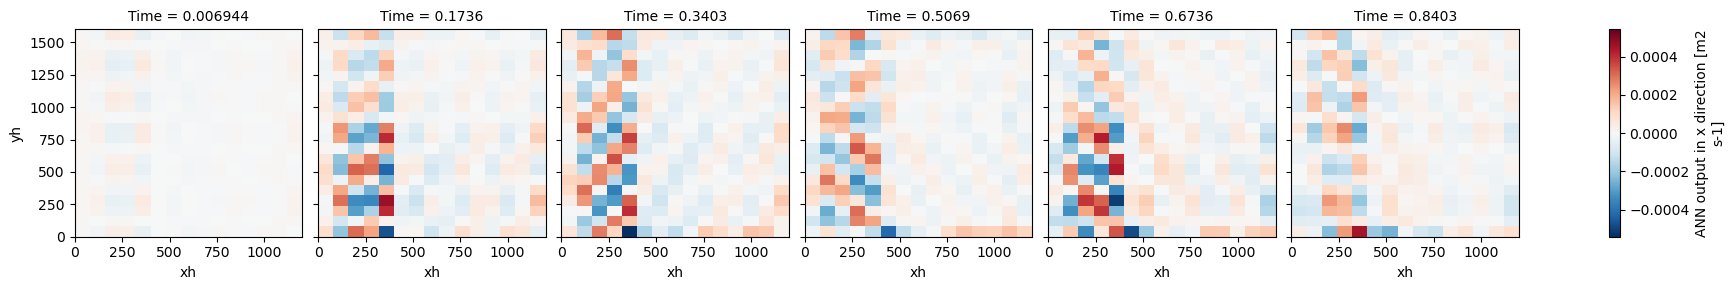

In [129]:
exp_ANN_4core['prog'].Fx.isel(zl=1, Time=slice(0, 144, 24)).plot(col='Time')

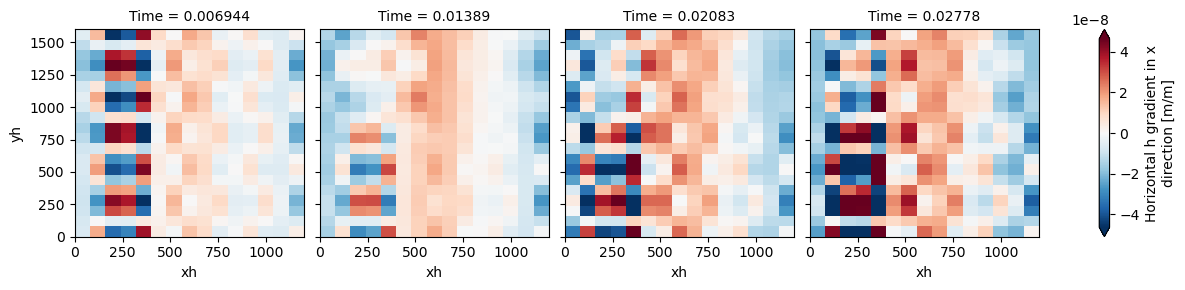

In [131]:
exp_ANN['prog'].dhdx.isel(zl=1, Time=slice(0, 4)).plot(col='Time', robust=True)

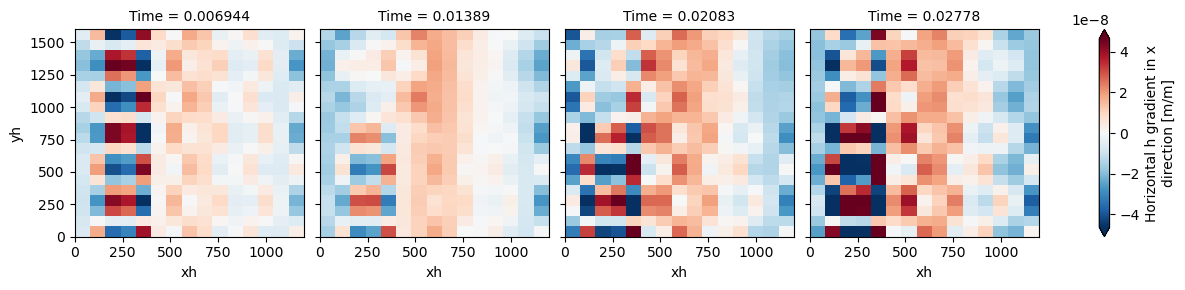

In [130]:
exp_ANN_4core['prog'].dhdx.isel(zl=1, Time=slice(0, 4)).plot(col='Time', robust=True)

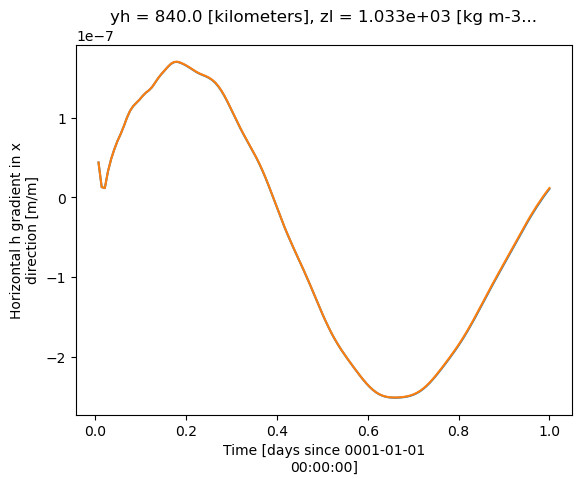

In [132]:
exp_ANN['prog'].dhdx.isel(zl=1, xh=2, yh= 10).plot()
exp_ANN_4core['prog'].dhdx.isel(zl=1, xh=2, yh= 10).plot()

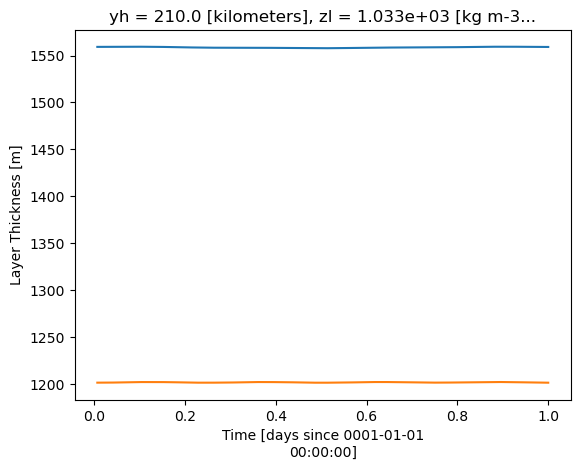

In [122]:
exp_ANN['prog'].h.isel(zl=1, xh=2, yh= 10).plot()
exp_ANN_4core['prog'].h.isel(zl=1, xh=2, yh= 10).plot()

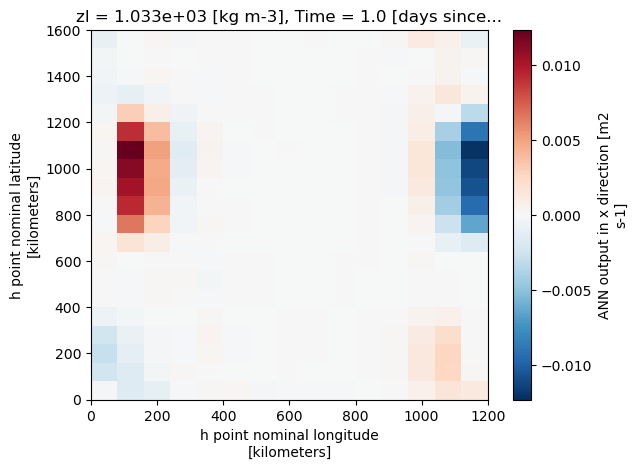

In [96]:
exp_ANN_4core['prog'].Fx.isel(zl=1, Time=-1).plot()

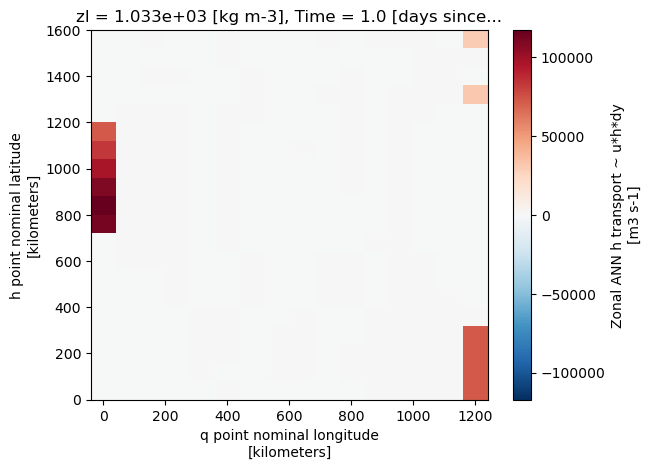

In [97]:
exp_ANN_4core['prog'].uhTrANN.isel(zl=1, Time=-1).plot()

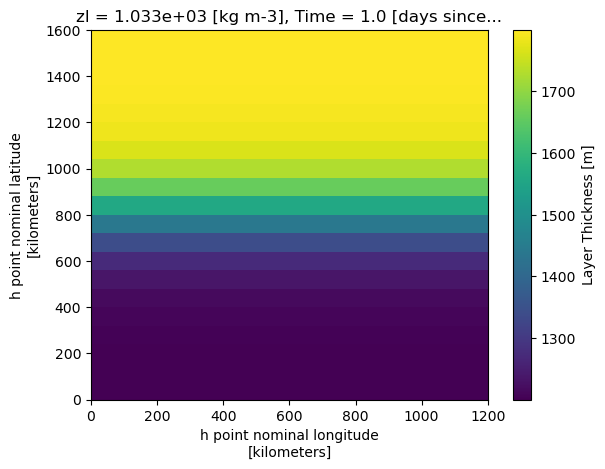

In [55]:
exp_ANN['prog'].h.isel(zl=1, Time=-1).plot()

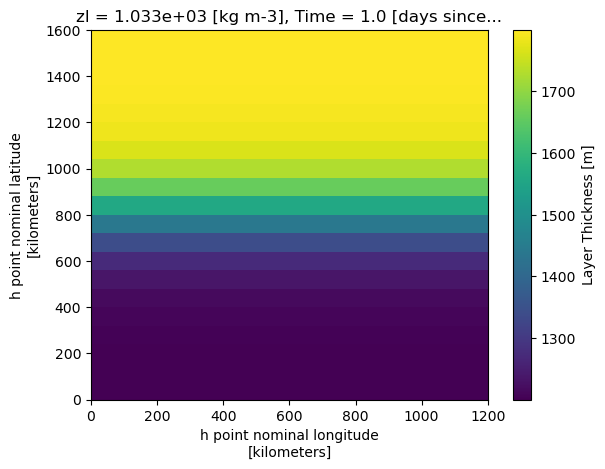

In [56]:
exp_ANN['prog'].h.isel(zl=1, Time=-1).plot()

In [101]:
exp_GM = load_data('/scratch/db194/mom6/mar2025/phillips2layer/Phillips_2layer_GM_test/')

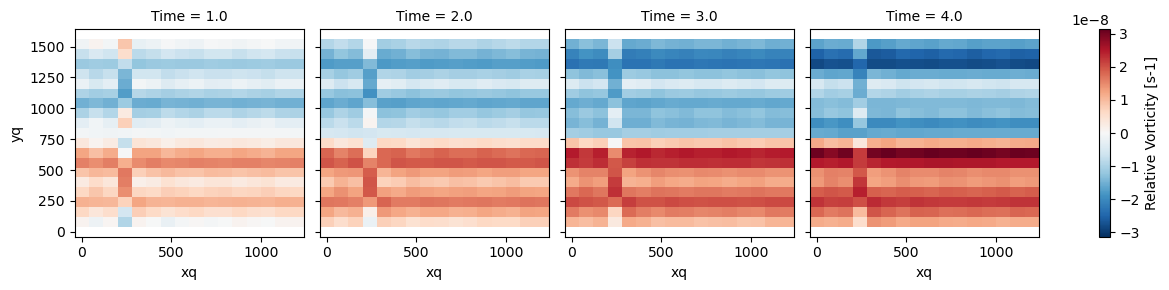

In [102]:
exp_GM['prog'].RV.isel(zl=1).plot(col='Time')

In [103]:
exp_ANN['prog']

<xarray.Dataset>
Dimensions:  (xq: 16, yh: 20, zl: 2, Time: 144, xh: 15, yq: 21, zi: 3)
Coordinates:
  * xq       (xq) float64 0.0 80.0 160.0 240.0 ... 1.04e+03 1.12e+03 1.2e+03
  * yh       (yh) float64 40.0 120.0 200.0 280.0 ... 1.4e+03 1.48e+03 1.56e+03
  * zl       (zl) float64 1.031e+03 1.033e+03
  * Time     (Time) float64 0.006944 0.01389 0.02083 ... 0.9861 0.9931 1.0
  * xh       (xh) float64 40.0 120.0 200.0 280.0 ... 1e+03 1.08e+03 1.16e+03
  * yq       (yq) float64 0.0 80.0 160.0 240.0 ... 1.44e+03 1.52e+03 1.6e+03
  * zi       (zi) float64 1.03e+03 1.032e+03 1.034e+03
Data variables:
    u        (Time, zl, yh, xq) float32 dask.array<chunksize=(144, 2, 20, 16), meta=np.ndarray>
    v        (Time, zl, yq, xh) float32 dask.array<chunksize=(144, 2, 21, 15), meta=np.ndarray>
    h        (Time, zl, yh, xh) float64 dask.array<chunksize=(144, 2, 20, 15), meta=np.ndarray>
    dhdx     (Time, zl, yh, xh) float64 dask.array<chunksize=(144, 2, 20, 15), meta=np.ndarray>
    dhdy     (Time, zl, yh, xh) float64 dask.array<chunksize=(144, 2, 20, 15), meta=np.ndarray>
    Fx       (Time, zl, yh, xh) float64 dask.array<chunksize=(144, 2, 20, 15), meta=np.ndarray>
    Fy       (Time, zl, yh, xh) float64 dask.array<chunksize=(144, 2, 20, 15), meta=np.ndarray>
    uhTrANN  (Time, zl, yh, xq) float64 dask.array<chunksize=(144, 2, 20, 16), meta=np.ndarray>
    vhTrANN  (Time, zl, yq, xh) float64 dask.array<chunksize=(144, 2, 21, 15), meta=np.ndarray>
    e        (Time, zi, yh, xh) float32 dask.array<chunksize=(144, 3, 20, 15), meta=np.ndarray>
    RV       (Time, zl, yq, xq) float32 dask.array<chunksize=(144, 2, 21, 16), meta=np.ndarray>
    PV       (Time, zl, yq, xq) float32 dask.array<chunksize=(144, 2, 21, 16), meta=np.ndarray>
Attributes:
    filename:   prog_00.nc
    title:      Phillips experiment
    grid_type:  regular
    grid_tile:  N/A

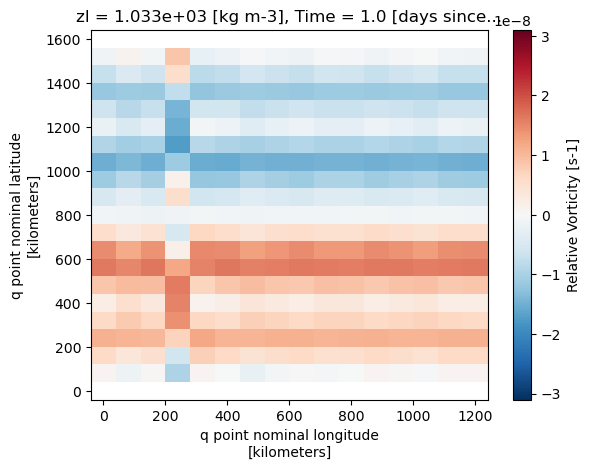

In [106]:
exp_ANN['prog'].RV.isel(zl=1, Time=-1).plot(vmin=-3.1e-8)

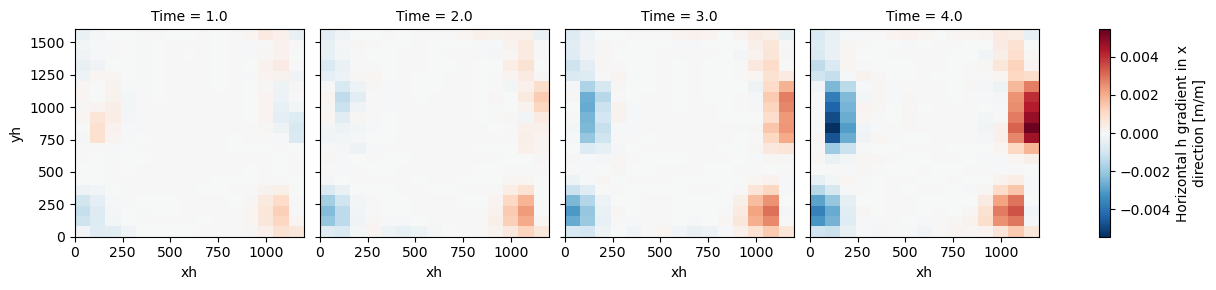

In [83]:
exp_ANN['prog'].dhdx.isel(zl=0).plot(col='Time')

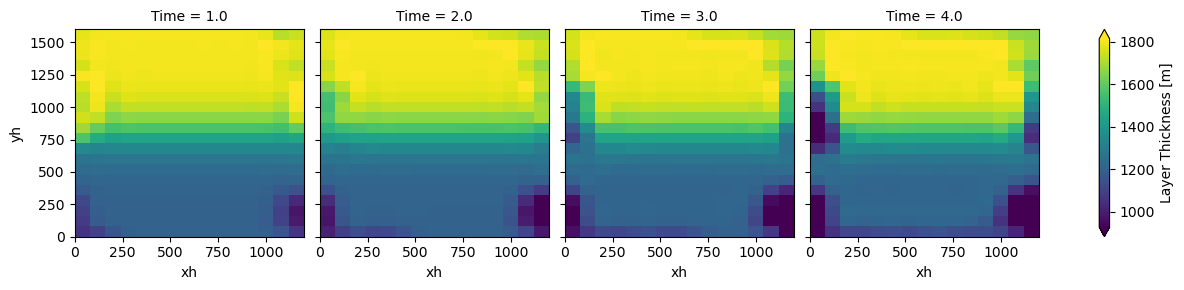

In [84]:
exp_ANN['prog'].h.isel(zl=1).plot(col='Time', robust=True)

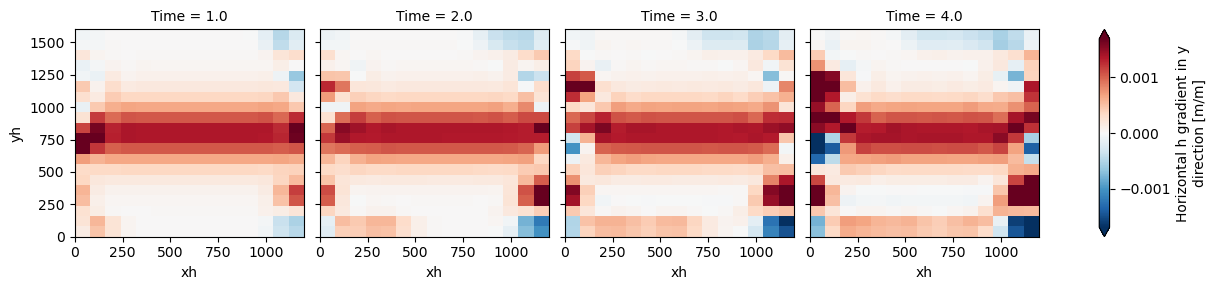

In [85]:
exp_ANN['prog'].dhdy.isel(zl=1).plot(col='Time', robust=True)

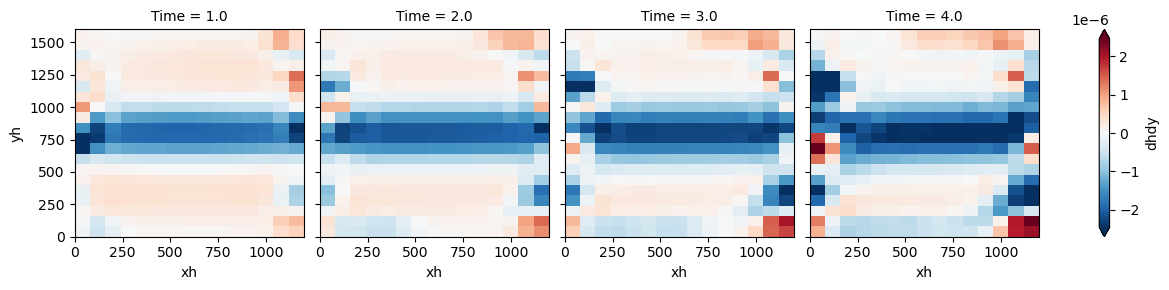

In [86]:
 (exp_ANN['prog'].dhdy.isel(zl=0) + exp_ANN['prog'].dhdy.isel(zl=1) ).plot(col='Time', robust=True)

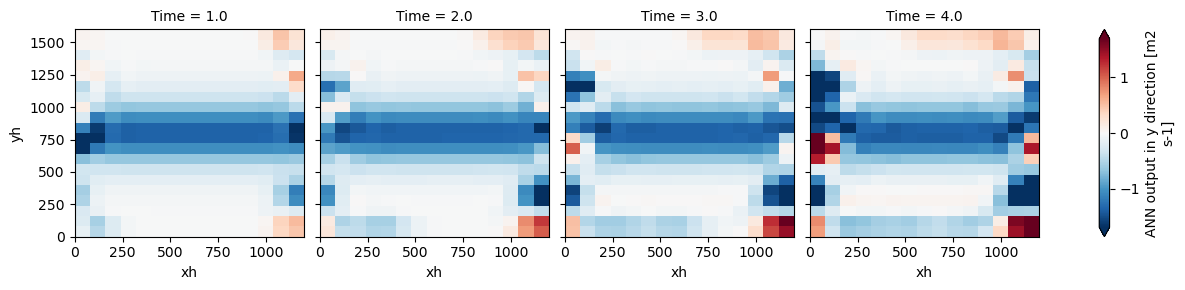

In [87]:
exp_ANN['prog'].Fy.isel(zl=1).plot(col='Time', robust=True)

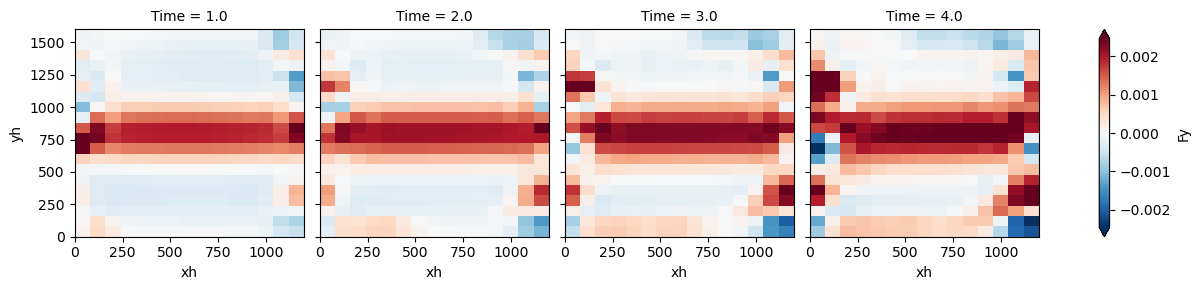

In [88]:
(exp_ANN['prog'].Fy.isel(zl=0) + exp_ANN['prog'].Fy.isel(zl=1)).plot(col='Time', robust=True)

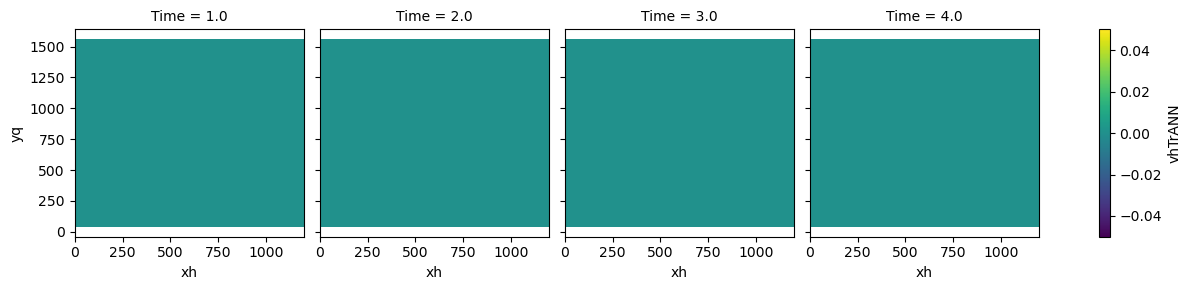

In [89]:
(exp_ANN['prog'].vhTrANN.isel(zl=0) + exp_ANN['prog'].vhTrANN.isel(zl=1)).plot(col='Time', robust=True)

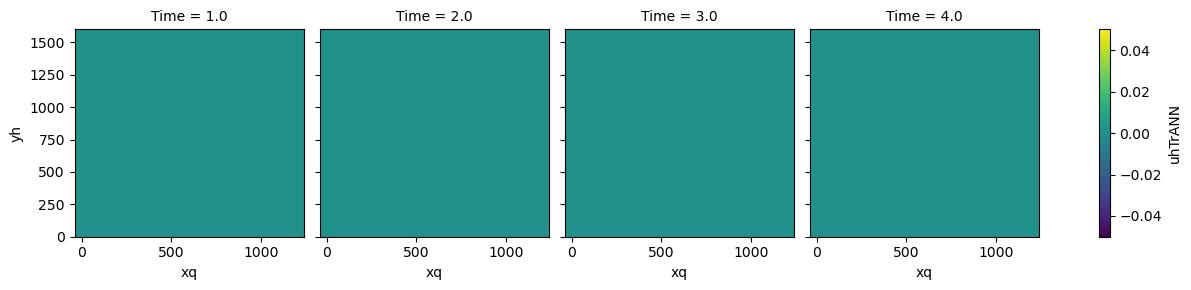

In [90]:
(exp_ANN['prog'].uhTrANN.isel(zl=0) + exp_ANN['prog'].uhTrANN.isel(zl=1)).plot(col='Time', robust=True)

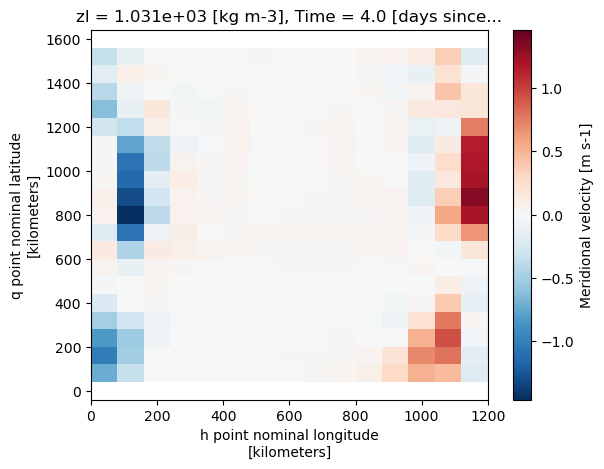

In [92]:
exp_ANN['prog'].v.isel(zl=0, Time=-1).plot()

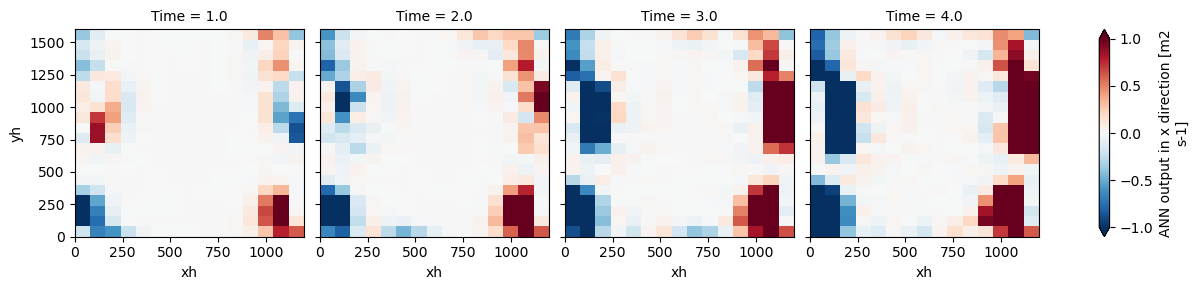

In [66]:
exp_ANN['prog'].Fx.isel(zl=1).plot(col='Time', vmin=-1)

In [74]:
1200/15

80.0

In [77]:
0.25 * 0.8 / ( 600 * ( 2/80e3**2 ) )

1066666.6666666667